<a href="https://colab.research.google.com/github/lisagirard/Snowsports/blob/main/CapstoneIV_UnSupervisedLearning_Hafjell_SkiingClusters_LisaGirard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESEARCH/INTENTION QUESTION

**CLUSTER SKI RESORT CLIENTS BASED ON DEMOGRAPHIC, WEATHER, INTEREST, FAMILY STRUCTURE, INTENTION, AND OTHER AVAILABLE FEATURES TO EXAMINE**


Data Source <br>
##The relative importance of ski resort- and weather-related characteristics when going alpine skiing: data from a rating-based conjoint survey

https://data.mendeley.com/datasets/6w4tzrs3yw

The data are related to two research articles: “The relative importance of ski resort-and weather-related characteristics when going alpine skiing” [1] and “Optimal pricing of alpine ski passes in the case of crowdedness and reduced skiing capacity” [2].  A rating-based conjoint survey experiment on active alpine skiers at a big ski area located in Inland Norway was performed in February of 2018 to collect the data and pertain to 400 respondents doing more than 7200 ratings. A total of ten versions of the same questionnaire type were used to obtain information about preferences on ski resort- and weather-related characteristics when going alpine skiing. We display the raw data organized such that they can be easily downloaded and used directly to either (1) replicate the analyses performed in the related research articles, or (2) run one’s own analyses on the topic of interest. The data may also be useful to lecturers teaching students about the key concepts of survey experiments and causal modelling.   

Haugom, Erik; Malasevska, Iveta; Lien, Gudbrand (2021), “The relative importance of ski resort- and weather-related characteristics when going alpine skiing: data from a rating-based conjoint survey”, Mendeley Data, V1, doi: 10.17632/6w4tzrs3yw.1

[1] https://www.tandfonline.com/doi/full/10.1080/23311886.2019.1681246

[2]https://link.springer.com/article/10.1007/s00181-020-01872-w

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## clustering algos and dimensionality reducers
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
from scipy import stats
import statistics
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

## clustering algos and dimensionality reducers
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn import metrics
!pip install umap-learn
import umap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pd.set_option('display.max_rows',None)

In [ ]:
#pd.read_csv('data.csv')  
all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/Hafjell-ski-data-csv-2018.csv")
all_data

ID QUESTIONAIRE_CODE  QUESTION CODE-QUESTION  QUE_TIME  WEKKDAY  PRICE  \
0       1          SLOPES-2         8     BAKKER-28        10  MIDWEEK    250   
1       1          SLOPES-2         8     BAKKER-28         5  MIDWEEK    350   
2       1          SLOPES-2         8     BAKKER-28         5  MIDWEEK    450   
3       1          SLOPES-2         8     BAKKER-28         1  MIDWEEK    550   
4       1          SLOPES-2         8     BAKKER-28        10  WEEKEND    250   
...   ...               ...       ...           ...       ...      ...    ...   
7177  400            WIND-1         9       VIND-19        10  WEEKEND    250   
7178  400            WIND-1         9       VIND-19        10  WEEKEND    350   
7179  400            WIND-1         9       VIND-19         5  WEEKEND    450   
7180  400            WIND-1         9       VIND-19         5  WEEKEND    550   
7181  400            WIND-1         9       VIND-19         1  WEEKEND    650   

            PERIOD WEATHER  TEMPERATURE  ... GEAR_OTHER  INCOME INCOME_L100  \
0     REGULAR WEEK     SUN           -5  ...          0     5.0           0   
1     REGULAR WEEK     SUN           -5  ...          0     5.0           0   
2     REGULAR WEEK     SUN           -5  ...          0     5.0           0   
3     REGULAR WEEK     SUN           -5  ...          0     5.0           0   
4     REGULAR WEEK     SUN           -5  ...          0     5.0           0   
...            ...     ...          ...  ...        ...     ...         ...   
7177  REGULAR WEEK  CLOUDY          -10  ...          0     2.0           0   
7178  REGULAR WEEK  CLOUDY          -10  ...          0     2.0           0   
7179  REGULAR WEEK  CLOUDY          -10  ...          0     2.0           0   
7180  REGULAR WEEK  CLOUDY          -10  ...          0     2.0           0   
7181  REGULAR WEEK  CLOUDY          -10  ...          0     2.0           0   

     INCOME_100-300  INCOME_300-600  INCOME_600-900  INCOME_900-1200  \
0                 0               0               0                0   
1                 0               0               0                0   
2                 0               0               0                0   
3                 0               0               0                0   
4                 0               0               0                0   
...             ...             ...             ...              ...   
7177              0               1               0                0   
7178              0               1               0                0   
7179              0               1               0                0   
7180              0               1               0                0   
7181              0               1               0                0   

      INCOME_M1200  INCOME_NOANSWER  SKIINTERESS  
0                1                0          5.0  
1                1                0          5.0  
2                1                0          5.0  
3                1                0          5.0  
4                1                0          5.0  
...            ...              ...          ...  
7177             0                0          2.0  
7178             0                0          2.0  
7179             0                0          2.0  
7180             0                0          2.0  
7181             0                0          2.0  

[7182 rows x 87 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_data.rename(columns = {'WEKKDAY':'WEEKDAY'}, inplace=True)
all_data.rename(columns = {'SKIINTERESS':'SKI_INTEREST'}, inplace=True)
all_data.rename(columns = {'TEMPERATURE':'TEMP_C'}, inplace=True)
all_data.rename(columns = {'TEMP_-20':'TEMP_-20C'}, inplace=True)
all_data.rename(columns = {'TEMP_-15':'TEMP_-15C'}, inplace=True)
all_data.rename(columns = {'TEMP_-10':'TEMP_-10C'}, inplace=True)
all_data.rename(columns = {'TEMP_-5':'TEMP_-5C'}, inplace=True)
all_data.rename(columns = {'TEMP_0':'TEMP_0C'}, inplace=True)
all_data.rename(columns = {'TEMP_P5':'TEMP_5C'}, inplace=True)
all_data.rename(columns = {'SINGEL':'SINGLE'}, inplace=True)
all_data.rename(columns = {'SINGEL_WCHILD':'SINGLE_WCHILD'}, inplace=True)
all_data.columns

Index(['ID', 'QUESTIONAIRE_CODE', 'QUESTION', 'CODE-QUESTION', 'QUE_TIME',
       'WEEKDAY', 'PRICE', 'PERIOD', 'WEATHER', 'TEMP_C', 'WIND',
       'SLOPES_OPEN', 'R8-HELP', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG',
       'TEMP_-20C', 'TEMP_-15C', 'TEMP_-10C', 'TEMP_-5C', 'TEMP_0C', 'TEMP_5C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK', 'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED',
       'WORK_STUDENT', 'WORK_OTHER', 'FAMILYSTATUS', 'SINGLE', 'SINGLE_WCHILD',
       'COUPLE', 'COUPLE_WCHILD', 'OTHER', 'DISTANCE', 'ANC_SK

In [ ]:
all_data.shape

(7182, 87)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7182 non-null   int64  
 1   QUESTIONAIRE_CODE       7182 non-null   object 
 2   QUESTION                7182 non-null   int64  
 3   CODE-QUESTION           7182 non-null   object 
 4   QUE_TIME                7182 non-null   int64  
 5   WEEKDAY                 7182 non-null   object 
 6   PRICE                   7182 non-null   int64  
 7   PERIOD                  7182 non-null   object 
 8   WEATHER                 7182 non-null   object 
 9   TEMP_C                  7182 non-null   int64  
 10  WIND                    7182 non-null   object 
 11  SLOPES_OPEN             7182 non-null   float64
 12  R8-HELP                 7182 non-null   object 
 13  RATING                  6491 non-null   object 
 14  QUE_1                   7182 non-null   

In [ ]:
all_data.describe(include = 'object')
#THESE GET CONVERTED LATER AS NEEDED

QUESTIONAIRE_CODE CODE-QUESTION  WEEKDAY        PERIOD WEATHER  \
count               7182          7182     7182          7182    7182   
unique                10            20        2             2       5   
top             SLOPES-1     BAKKER-18  WEEKEND  REGULAR WEEK     SUN   
freq                 810           405     3990          6831    3690   

           WIND   R8-HELP RATING  
count      7182      7182   6491  
unique        3        18     67  
top     NO WIND  8_1_rate      0  
freq       5436       399   1158

In [ ]:
#CHECKING FOR NULLS
all_data.isna().sum()


ID                     0
QUESTIONAIRE_CODE      0
QUESTION               0
CODE-QUESTION          0
QUE_TIME               0
                    ... 
INCOME_600-900         0
INCOME_900-1200        0
INCOME_M1200           0
INCOME_NOANSWER        0
SKI_INTEREST         180
Length: 87, dtype: int64

In [ ]:
all_data.fillna(0, inplace=True)

In [ ]:
#CHECKING FOR NULLS
all_data.isna().sum()


ID                   0
QUESTIONAIRE_CODE    0
QUESTION             0
CODE-QUESTION        0
QUE_TIME             0
                    ..
INCOME_600-900       0
INCOME_900-1200      0
INCOME_M1200         0
INCOME_NOANSWER      0
SKI_INTEREST         0
Length: 87, dtype: int64

# CHECK DISTROS

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


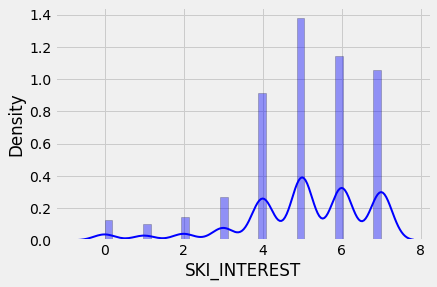

In [ ]:
# CHECKING SOME DISTRIBUTIONS BEFORE ENCODING AND CHANGING DATA
sns.distplot(all_data['SKI_INTEREST'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


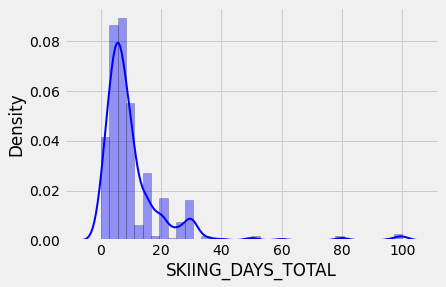

In [ ]:
# CHECKING SOME DISTRIBUTIONS BEFORE ENCODING AND CHANGING DATA
sns.distplot(all_data['SKIING_DAYS_TOTAL'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


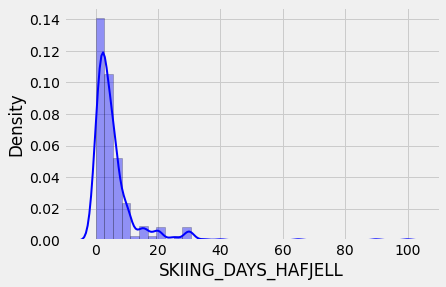

In [ ]:
# CHECKING SOME DISTRIBUTIONS BEFORE ENCODING AND CHANGING DATA
sns.distplot(all_data['SKIING_DAYS_HAFJELL'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


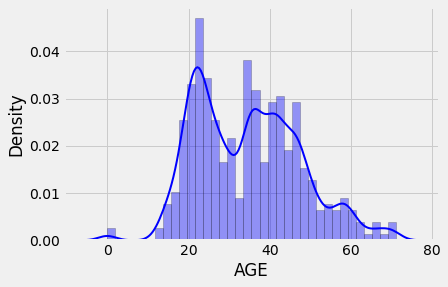

In [ ]:
# CHECKING SOME DISTRIBUTIONS BEFORE ENCODING AND CHANGING DATA
sns.distplot(all_data['AGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# converting type of OBJECT columns to 'category'
all_data['PERIOD'] = all_data['PERIOD'].astype('category')
all_data['WEATHER'] = all_data['WEATHER'].astype('category')
all_data['WIND'] = all_data['WIND'].astype('category')
all_data['R8-HELP'] = all_data['R8-HELP'].astype('category')
all_data['WEEKDAY'] = all_data['WEEKDAY'].astype('category')
all_data['QUESTIONAIRE_CODE'] = all_data['QUESTIONAIRE_CODE'].astype('category')
all_data['CODE-QUESTION'] = all_data['CODE-QUESTION'].astype('category')
all_data['PERIOD'].dtype

CategoricalDtype(categories=['REGULAR WEEK', 'VACATION'], ordered=False)

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values to string/object types
all_data['PERIOD'] = labelencoder.fit_transform(all_data['PERIOD'])
all_data['WEATHER'] = labelencoder.fit_transform(all_data['WEATHER'])
all_data['WIND'] = labelencoder.fit_transform(all_data['WIND'])
all_data['R8-HELP'] = labelencoder.fit_transform(all_data['R8-HELP'])
all_data['WEEKDAY'] = labelencoder.fit_transform(all_data['WEEKDAY'])
all_data['QUESTIONAIRE_CODE'] = labelencoder.fit_transform(all_data['QUESTIONAIRE_CODE'])
all_data['CODE-QUESTION'] = labelencoder.fit_transform(all_data['CODE-QUESTION'])
all_data.head()

ID  QUESTIONAIRE_CODE  QUESTION  CODE-QUESTION  QUE_TIME  WEEKDAY  PRICE  \
0   1                  2         8              2        10        0    250   
1   1                  2         8              2         5        0    350   
2   1                  2         8              2         5        0    450   
3   1                  2         8              2         1        0    550   
4   1                  2         8              2        10        1    250   

   PERIOD  WEATHER  TEMP_C  ...  GEAR_OTHER  INCOME  INCOME_L100  \
0       0        4      -5  ...           0     5.0            0   
1       0        4      -5  ...           0     5.0            0   
2       0        4      -5  ...           0     5.0            0   
3       0        4      -5  ...           0     5.0            0   
4       0        4      -5  ...           0     5.0            0   

  INCOME_100-300  INCOME_300-600  INCOME_600-900  INCOME_900-1200  \
0              0               0               0                0   
1              0               0               0                0   
2              0               0               0                0   
3              0               0               0                0   
4              0               0               0                0   

   INCOME_M1200  INCOME_NOANSWER  SKI_INTEREST  
0             1                0           5.0  
1             1                0           5.0  
2             1                0           5.0  
3             1                0           5.0  
4             1                0           5.0  

[5 rows x 87 columns]

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7182 non-null   int64  
 1   QUESTIONAIRE_CODE       7182 non-null   int64  
 2   QUESTION                7182 non-null   int64  
 3   CODE-QUESTION           7182 non-null   int64  
 4   QUE_TIME                7182 non-null   int64  
 5   WEEKDAY                 7182 non-null   int64  
 6   PRICE                   7182 non-null   int64  
 7   PERIOD                  7182 non-null   int64  
 8   WEATHER                 7182 non-null   int64  
 9   TEMP_C                  7182 non-null   int64  
 10  WIND                    7182 non-null   int64  
 11  SLOPES_OPEN             7182 non-null   float64
 12  R8-HELP                 7182 non-null   int64  
 13  RATING                  7182 non-null   object 
 14  QUE_1                   7182 non-null   

In [ ]:
all_data['RATING'] = all_data['RATING'].fillna(0)
all_data['RATING'].isna().sum()


0

In [ ]:
all_data['RATING'].replace({'AN':0},inplace=True)
# FOUND 'AN' ON ORIGINAL DATA SPREADSHEET LINE 4441

In [ ]:
# convert RATING object to integer
all_data['RATING'].dtype
all_data["RATING"] = all_data["RATING"].astype(str).astype(int)

In [ ]:
all_data['RATING'].iloc[4440:4445]

4440    0
4441    0
4442    0
4443    0
4444    0
Name: RATING, dtype: int64

In [ ]:
all_data

ID  QUESTIONAIRE_CODE  QUESTION  CODE-QUESTION  QUE_TIME  WEEKDAY  \
0       1                  2         8              2        10        0   
1       1                  2         8              2         5        0   
2       1                  2         8              2         5        0   
3       1                  2         8              2         1        0   
4       1                  2         8              2        10        1   
...   ...                ...       ...            ...       ...      ...   
7177  400                  8         9             17        10        1   
7178  400                  8         9             17        10        1   
7179  400                  8         9             17         5        1   
7180  400                  8         9             17         5        1   
7181  400                  8         9             17         1        1   

      PRICE  PERIOD  WEATHER  TEMP_C  ...  GEAR_OTHER  INCOME  INCOME_L100  \
0       250       0        4      -5  ...           0     5.0            0   
1       350       0        4      -5  ...           0     5.0            0   
2       450       0        4      -5  ...           0     5.0            0   
3       550       0        4      -5  ...           0     5.0            0   
4       250       0        4      -5  ...           0     5.0            0   
...     ...     ...      ...     ...  ...         ...     ...          ...   
7177    250       0        0     -10  ...           0     2.0            0   
7178    350       0        0     -10  ...           0     2.0            0   
7179    450       0        0     -10  ...           0     2.0            0   
7180    550       0        0     -10  ...           0     2.0            0   
7181    650       0        0     -10  ...           0     2.0            0   

      INCOME_100-300  INCOME_300-600  INCOME_600-900  INCOME_900-1200  \
0                  0               0               0                0   
1                  0               0               0                0   
2                  0               0               0                0   
3                  0               0               0                0   
4                  0               0               0                0   
...              ...             ...             ...              ...   
7177               0               1               0                0   
7178               0               1               0                0   
7179               0               1               0                0   
7180               0               1               0                0   
7181               0               1               0                0   

      INCOME_M1200  INCOME_NOANSWER  SKI_INTEREST  
0                1                0           5.0  
1                1                0           5.0  
2                1                0           5.0  
3                1                0           5.0  
4                1                0           5.0  
...            ...              ...           ...  
7177             0                0           2.0  
7178             0                0           2.0  
7179             0                0           2.0  
7180             0                0           2.0  
7181             0                0           2.0  

[7182 rows x 87 columns]

NOW EVERYTHING IS CONVERTED TO INTS AND FLOATS AND OBJECT LABELS HAVE BEEN ENCODED TO INTS

In [ ]:
all_data.isna().sum()


ID                   0
QUESTIONAIRE_CODE    0
QUESTION             0
CODE-QUESTION        0
QUE_TIME             0
                    ..
INCOME_600-900       0
INCOME_900-1200      0
INCOME_M1200         0
INCOME_NOANSWER      0
SKI_INTEREST         0
Length: 87, dtype: int64

In [ ]:
all_data['ANC_SPORT_STORE'].describe()

count    7182.000000
mean        0.258145
std         0.437645
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ANC_SPORT_STORE, dtype: float64

In [ ]:
all_data.describe()

ID  QUESTIONAIRE_CODE     QUESTION  CODE-QUESTION  \
count  7182.000000        7182.000000  7182.000000    7182.000000   
mean    200.586466           4.411028     8.500000       9.302005   
std     115.609416           2.887643     0.500035       5.823854   
min       1.000000           0.000000     8.000000       0.000000   
25%     100.000000           2.000000     8.000000       4.000000   
50%     201.000000           4.000000     8.500000       9.000000   
75%     301.000000           7.000000     9.000000      14.000000   
max     400.000000           9.000000     9.000000      19.000000   

          QUE_TIME      WEEKDAY        PRICE       PERIOD      WEATHER  \
count  7182.000000  7182.000000  7182.000000  7182.000000  7182.000000   
mean      5.777778     0.555556   427.777778     0.048872     2.929825   
std       3.359393     0.496939   131.477593     0.215616     1.363817   
min       1.000000     0.000000   250.000000     0.000000     0.000000   
25%       5.000000     0.000000   350.000000     0.000000     2.000000   
50%       5.000000     1.000000   450.000000     0.000000     4.000000   
75%      10.000000     1.000000   550.000000     0.000000     4.000000   
max      10.000000     1.000000   650.000000     1.000000     4.000000   

            TEMP_C  ...   GEAR_OTHER       INCOME  INCOME_L100  \
count  7182.000000  ...  7182.000000  7182.000000  7182.000000   
mean     -5.194236  ...     0.037594     3.378446     0.057644   
std       6.927862  ...     0.190225     1.941542     0.233085   
min     -20.000000  ...     0.000000     0.000000     0.000000   
25%     -10.000000  ...     0.000000     2.000000     0.000000   
50%      -5.000000  ...     0.000000     3.000000     0.000000   
75%       0.000000  ...     0.000000     5.000000     0.000000   
max       5.000000  ...     1.000000     6.000000     1.000000   

       INCOME_100-300  INCOME_300-600  INCOME_600-900  INCOME_900-1200  \
count     7182.000000     7182.000000     7182.000000      7182.000000   
mean         0.087719        0.155388        0.190476         0.125313   
std          0.282906        0.362300        0.392704         0.331097   
min          0.000000        0.000000        0.000000         0.000000   
25%          0.000000        0.000000        0.000000         0.000000   
50%          0.000000        0.000000        0.000000         0.000000   
75%          0.000000        0.000000        0.000000         0.000000   
max          1.000000        1.000000        1.000000         1.000000   

       INCOME_M1200  INCOME_NOANSWER  SKI_INTEREST  
count   7182.000000      7182.000000   7182.000000  
mean       0.137845         0.203008      5.062657  
std        0.344761         0.402266      1.620343  
min        0.000000         0.000000      0.000000  
25%        0.000000         0.000000      4.000000  
50%        0.000000         0.000000      5.000000  
75%        0.000000         0.000000      6.000000  
max        1.000000         1.000000      7.000000  

[8 rows x 87 columns]

# CHECKING FOR OUTLIERS
specificially on continuous variables of: <BR>
* AGE
* SKIING_DAYS_TOTAL
* SKIING_DAYS_HAFJELL
* RATING
* DISTANCE

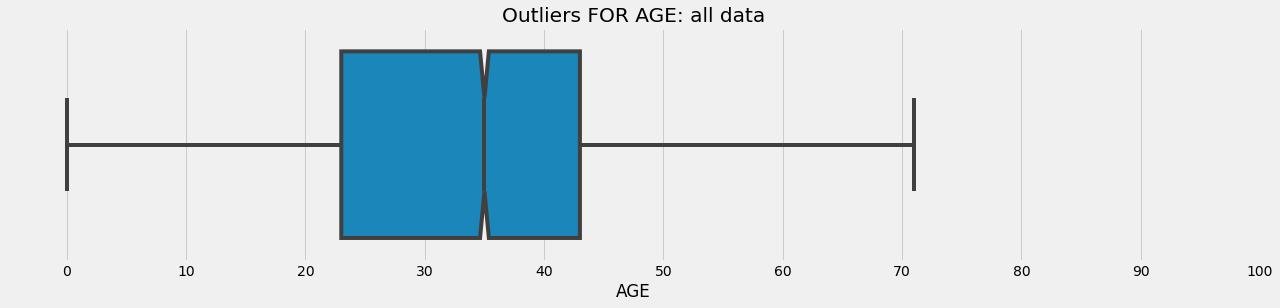

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['AGE'], notch=True)
plt.title("Outliers FOR AGE: all data")
plt.xlim(-5, 100)
plt.locator_params(axis='x', nbins=20)
plt.show()

NO AGE OUTLIERS

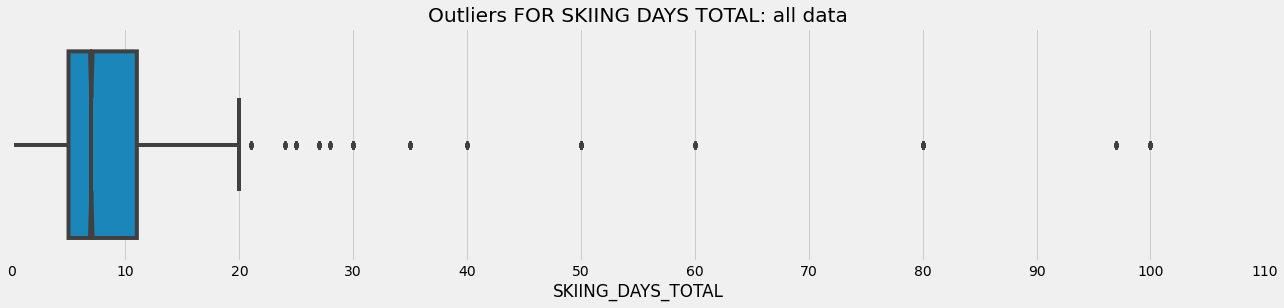

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['SKIING_DAYS_TOTAL'], notch=True)
plt.title("Outliers FOR SKIING DAYS TOTAL: all data")
plt.xlim(0, 110)
plt.locator_params(axis='x', nbins=20)
plt.show()

In [ ]:
all_data['SKIING_DAYS_TOTAL'].describe()

count    7182.000000
mean       10.754386
std        13.166331
min         0.000000
25%         5.000000
50%         7.000000
75%        11.000000
max       100.000000
Name: SKIING_DAYS_TOTAL, dtype: float64

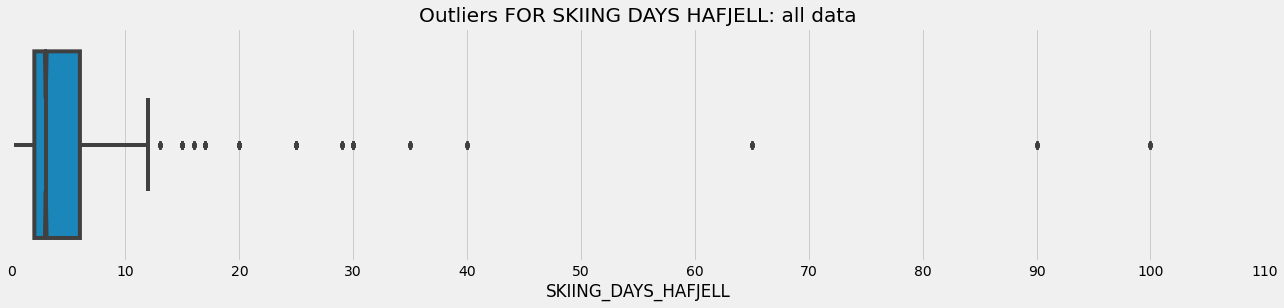

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['SKIING_DAYS_HAFJELL'], notch=True)
plt.title("Outliers FOR SKIING DAYS HAFJELL: all data")
plt.xlim(0, 110)
plt.locator_params(axis='x', nbins=20)
plt.show()

In [ ]:
all_data['SKIING_DAYS_HAFJELL'].describe()

count    7182.000000
mean        6.000000
std         9.409231
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       100.000000
Name: SKIING_DAYS_HAFJELL, dtype: float64

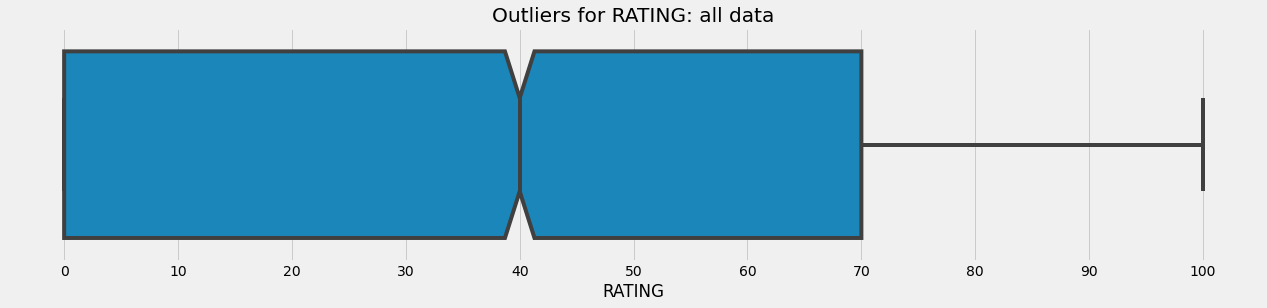

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['RATING'], notch=True)
plt.title("Outliers for RATING: all data")
plt.xlim(-5, 105)
plt.locator_params(axis='x', nbins=20)
plt.show()

**NO OUTLIERS FOR RATING**

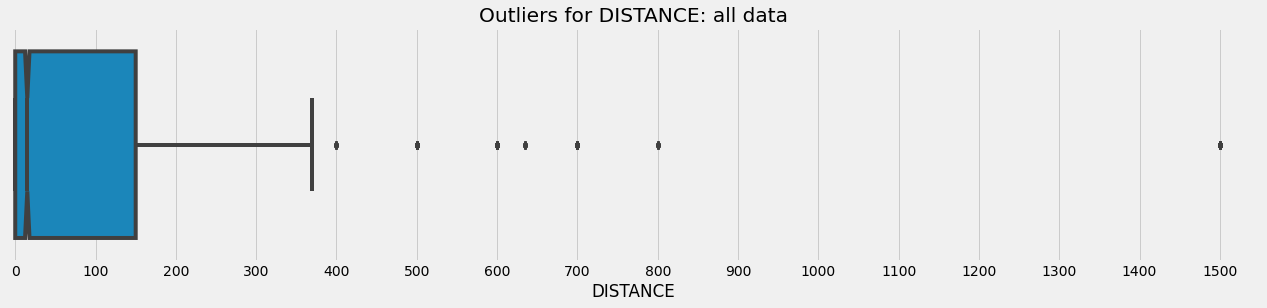

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['DISTANCE'], notch=True)
plt.title("Outliers for DISTANCE: all data")
plt.xlim(-10, 1550)
plt.locator_params(axis='x', nbins=20)
plt.show()

In [ ]:
all_data['DISTANCE'].describe()

count    7182.000000
mean       92.335840
std       171.522326
min         0.000000
25%         0.000000
50%        15.000000
75%       150.000000
max      1500.000000
Name: DISTANCE, dtype: float64

#WINSORIZING


In [ ]:
#co_ski_data['SWE-w'] = winsorize((co_ski_data['SWE']),(0.05, 0.05), inplace=False) #false inplace keeps Orig Max Base Depth in there for now and doesnt overwrite the orig values

# rewriting the winsored over the original
all_data['DISTANCE'] = winsorize((all_data['DISTANCE']),(0.05, 0.05), inplace=True)
all_data['SKIING_DAYS_TOTAL'] = winsorize((all_data['SKIING_DAYS_TOTAL']),(0.0, 0.11), inplace=True)
all_data['SKIING_DAYS_HAFJELL'] = winsorize((all_data['SKIING_DAYS_HAFJELL']),(0.0, 0.11), inplace=True)

# all_data['DISTANCE-w'] = winsorize((all_data['DISTANCE']),(0.05, 0.05), inplace=False)
# all_data['SKIING_DAYS_TOTAL-w'] = winsorize((all_data['SKIING_DAYS_TOTAL']),(0.0, 0.11), inplace=False)
# all_data['SKIING_DAYS_HAFJELL-w'] = winsorize((all_data['SKIING_DAYS_HAFJELL']),(0.0, 0.11), inplace=False)

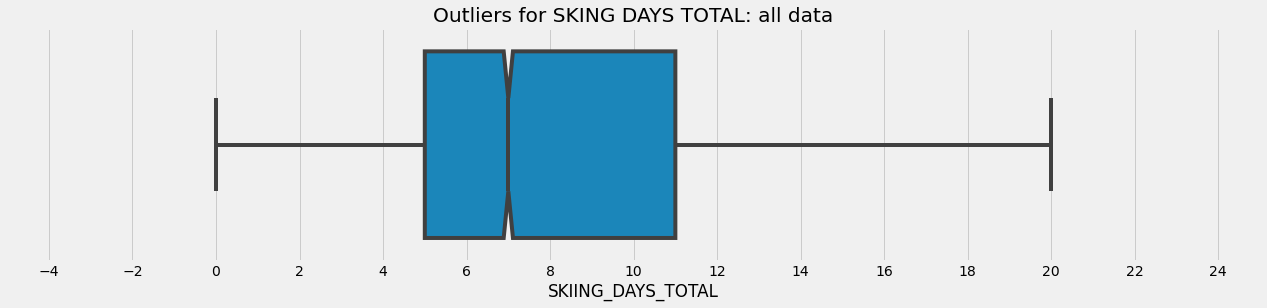

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['SKIING_DAYS_TOTAL'], notch=True)
plt.title("Outliers for SKING DAYS TOTAL: all data")
plt.xlim(-5, 25)
plt.locator_params(axis='x', nbins=20)
plt.show()

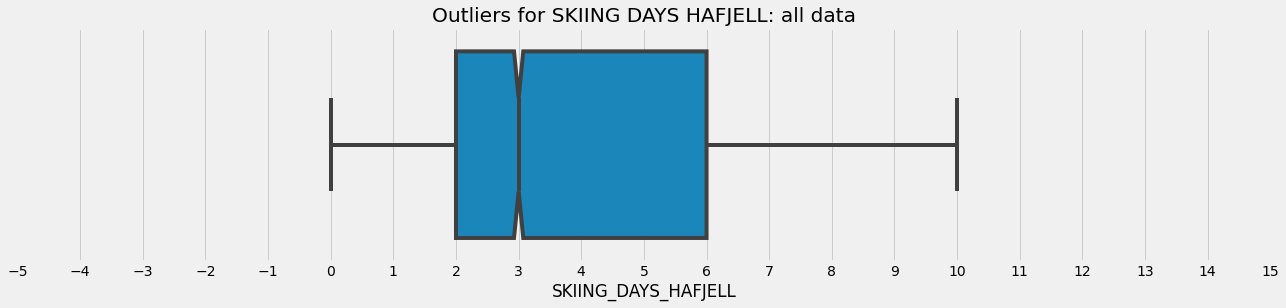

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['SKIING_DAYS_HAFJELL'], notch=True)
plt.title("Outliers for SKIING DAYS HAFJELL: all data")
plt.xlim(-5, 15)
plt.locator_params(axis='x', nbins=20)
plt.show()

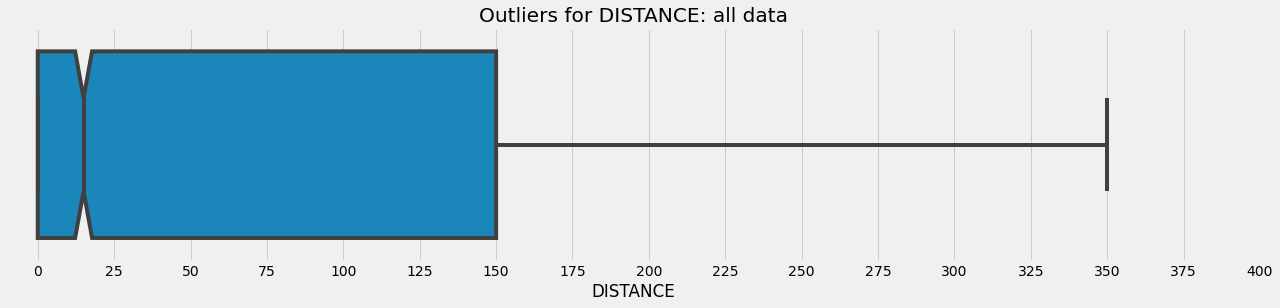

In [ ]:
#chekcing for outliers with boxplot
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = all_data['DISTANCE'], notch=True)
plt.title("Outliers for DISTANCE: all data")
plt.xlim(-10, 400)
plt.locator_params(axis='x', nbins=20)
plt.show()

In [ ]:
#dropping original creates of =w versions
all_data.drop(['DISTANCE-w','SKIING_DAYS_TOTAL-w', 'SKIING_DAYS_HAFJELL-w'],axis=1, inplace=True)


In [ ]:
all_data.head()

ID  QUESTIONAIRE_CODE  QUESTION  CODE-QUESTION  QUE_TIME  WEEKDAY  PRICE  \
0   1                  2         8              2        10        0    250   
1   1                  2         8              2         5        0    350   
2   1                  2         8              2         5        0    450   
3   1                  2         8              2         1        0    550   
4   1                  2         8              2        10        1    250   

   PERIOD  WEATHER  TEMP_C  ...  GEAR_OTHER  INCOME  INCOME_L100  \
0       0        4      -5  ...           0     5.0            0   
1       0        4      -5  ...           0     5.0            0   
2       0        4      -5  ...           0     5.0            0   
3       0        4      -5  ...           0     5.0            0   
4       0        4      -5  ...           0     5.0            0   

   INCOME_100-300  INCOME_300-600  INCOME_600-900  INCOME_900-1200  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   INCOME_M1200  INCOME_NOANSWER  SKI_INTEREST  
0             1                0           5.0  
1             1                0           5.0  
2             1                0           5.0  
3             1                0           5.0  
4             1                0           5.0  

[5 rows x 87 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF TEMPERATURE IN CELSIUS')

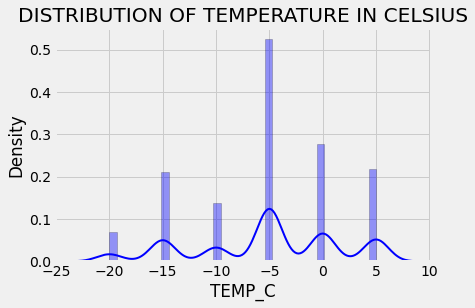

In [ ]:
# CHECKING SOME DISTRIBUTIONS BEFORE ENCODING AND CHANGING DATA
sns.distplot(all_data['TEMP_C'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('DISTRIBUTION OF TEMPERATURE IN CELSIUS')

**CHECKING SOME DISTRIBUTIONS HISTROGRAMS**

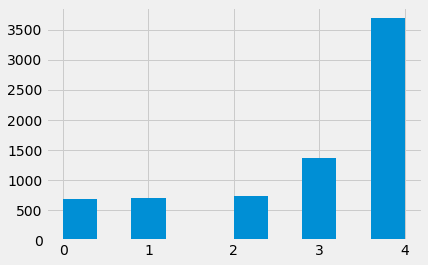

In [ ]:
plt.hist(all_data['WEATHER'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


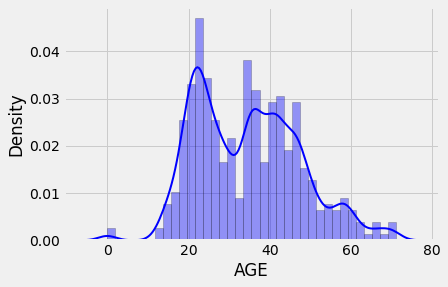

In [ ]:
sns.distplot(all_data['AGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# EDA:
* renamed some columns to be more clear and in relation to temperature
* removed NANs (reviewed and filled with 0)
* recoded object strings
* reviewed and removed outliers in continuous data (AGE, SKIING_DAYS_TOTAL, SKIING_DAYS_HAFJELL) 
* reviewed some histograms for distributions on some variables of possible interest (continous variables or those with greater integer variance)

# <font color = 'red'> BUILD NEW FEATURE SET THAT ADDRESSES BEHAVIOR/CHARACTERISTICS FACTORS</font>

In [ ]:
all_data['ID'].nunique()
# ID column is 400 survey respondents, so like "user ID"

399

In [ ]:
all_data_v2 = all_data.copy()

In [ ]:
all_data_v2.shape

(7182, 87)

In [ ]:
all_data_v2 = all_data_v2.drop_duplicates()

In [ ]:
all_data_v2.shape

## NO DUPES??

(7182, 87)

In [ ]:
weather_list = ['WEATHER',
                'TEMP_C',                
                'WIND',
                'SUN',
                'RAIN',
                'SNOW',
                'CLOUD',
                'FOG',
                'TEMP_-20C',
                'TEMP_-15C',
                'TEMP_-10C',
                'TEMP_-5C',
                'TEMP_0C',
                'TEMP_5C',
                'NO_WIND',
                'GENTLE_BREEZE',
                'FRESH_BREEZE'              
                ]
# REMOVED  'TEMP_F' BC ONLY ONE TEMP MEASURING IS NEEDED AND OTHER TEMPS ARE C

In [ ]:
all_data.columns

Index(['ID', 'QUESTIONAIRE_CODE', 'QUESTION', 'CODE-QUESTION', 'QUE_TIME',
       'WEEKDAY', 'PRICE', 'PERIOD', 'WEATHER', 'TEMP_C', 'TEMP_F', 'WIND',
       'SLOPES_OPEN', 'R8-HELP', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG',
       'TEMP_-20C', 'TEMP_-15C', 'TEMP_-10C', 'TEMP_-5C', 'TEMP_0C', 'TEMP_5C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK', 'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED',
       'WORK_STUDENT', 'WORK_OTHER', 'FAMILYSTATUS', 'SINGLE', 'SINGLE_WCHILD',
       'COUPLE', 'COUPLE_WCHILD', 'OTHER', 'DISTANCE

In [ ]:
behaviors_list = ['SLOPES_OPEN', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG', 'TEMP_C',
       'TEMP_-20C', 'TEMP_-15C', 'TEMP_-10C', 'TEMP_-5C', 'TEMP_0C', 'TEMP_5C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED',
       'WORK_STUDENT', 'WORK_OTHER', 'SINGLE', 'SINGLE_WCHILD',
       'COUPLE', 'COUPLE_WCHILD', 'OTHER', 'DISTANCE', 'ANC_SKI_RENT',
       'ANC_RESTAURANTS', 'ANC_SKISCHOOL', 'ANC_CHILD_ACTIVITIES',
       'ANC_SPORT_STORE', 'GEAR_ALPIN_SKI', 'GEAR_SNOWBOARD',
       'GEAR_OTHER', 'INCOME_L100', 'INCOME_100-300',
       'INCOME_300-600', 'INCOME_600-900', 'INCOME_900-1200', 'INCOME_M1200',
       'INCOME_NOANSWER', 'SKI_INTEREST'                 
                  ]

In [ ]:
behavior_df_orig = all_data_v2[behaviors_list]
behavior_df_orig.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  TEMP_-20C  TEMP_-15C  TEMP_-10C  TEMP_-5C  TEMP_0C  TEMP_5C  \
0      -5          0          0          0         1        0        0   
1      -5          0          0          0         1        0        0   
2      -5          0          0          0         1        0        0   
3      -5          0          0          0         1        0        0   
4      -5          0          0          0         1        0        0   

   NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  SLOPES_100  \
0        1              0             0          0          0           1   
1        1              0             0          0          0           1   
2        1              0             0          0          0           1   
3        1              0             0          0          0           1   
4        1              0             0          0          0           1   

   MALE  FEMALE   AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0   0.0       1  47.0                2.0                6.0   
1   0.0       1  47.0                2.0                6.0   
2   0.0       1  47.0                2.0                6.0   
3   0.0       1  47.0                2.0                6.0   
4   0.0       1  47.0                2.0                6.0   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                  0.0               1               1                 0   
1                  0.0               1               1                 0   
2                  0.0               1               1                 0   
3                  0.0               1               1                 0   
4                  0.0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  

In [ ]:
behavior_df_orig.shape

(7182, 72)

In [ ]:
behavior_df_orig.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  TEMP_-20C  TEMP_-15C  TEMP_-10C  TEMP_-5C  TEMP_0C  TEMP_5C  \
0      -5          0          0          0         1        0        0   
1      -5          0          0          0         1        0        0   
2      -5          0          0          0         1        0        0   
3      -5          0          0          0         1        0        0   
4      -5          0          0          0         1        0        0   

   NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  SLOPES_100  \
0        1              0             0          0          0           1   
1        1              0             0          0          0           1   
2        1              0             0          0          0           1   
3        1              0             0          0          0           1   
4        1              0             0          0          0           1   

   MALE  FEMALE   AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0   0.0       1  47.0                2.0                6.0   
1   0.0       1  47.0                2.0                6.0   
2   0.0       1  47.0                2.0                6.0   
3   0.0       1  47.0                2.0                6.0   
4   0.0       1  47.0                2.0                6.0   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                  0.0               1               1                 0   
1                  0.0               1               1                 0   
2                  0.0               1               1                 0   
3                  0.0               1               1                 0   
4                  0.0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  

In [ ]:
behavior_df = behavior_df_orig.copy()

In [ ]:
#pd.options.display.max_columns = None

In [ ]:
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7182 entries, 0 to 7181
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SLOPES_OPEN             7182 non-null   float64
 1   RATING                  7182 non-null   int64  
 2   QUE_1                   7182 non-null   int64  
 3   QUE_5                   7182 non-null   int64  
 4   QUE_10                  7182 non-null   int64  
 5   MIDWEEK                 7182 non-null   int64  
 6   WEEKEND                 7182 non-null   int64  
 7   REGULAR_WEEK            7182 non-null   int64  
 8   VACATION                7182 non-null   int64  
 9   P250                    7182 non-null   int64  
 10  P350                    7182 non-null   int64  
 11  P450                    7182 non-null   int64  
 12  P550                    7182 non-null   int64  
 13  P650                    7182 non-null   int64  
 14  SUN                     7182 non-null   

In [ ]:
# CONVERTING FLOATS TO INTS
behavior_df['DISTANCE'] = behavior_df['DISTANCE'].astype('int')
behavior_df['SKI_INTEREST'] = behavior_df['SKI_INTEREST'].astype('int')
behavior_df['AGE'] = behavior_df['AGE'].astype('int')
behavior_df['MALE'] = behavior_df['MALE'].astype('int')
behavior_df['ANC_SKI_RENT'] = behavior_df['ANC_SKI_RENT'].astype('int')
behavior_df['ANC_RESTAURANTS'] = behavior_df['ANC_RESTAURANTS'].astype('int')
behavior_df['ANC_SKISCHOOL'] = behavior_df['ANC_SKISCHOOL'].astype('int')
behavior_df['ANC_CHILD_ACTIVITIES'] = behavior_df['ANC_CHILD_ACTIVITIES'].astype('int')
behavior_df['ANC_SPORT_STORE'] = behavior_df['ANC_SPORT_STORE'].astype('int')
behavior_df['ANC_SPORT_STORE'] = behavior_df['ANC_SPORT_STORE'].astype('int')
behavior_df['HAFJELL_RESIDENCE'] = behavior_df['HAFJELL_RESIDENCE'].astype('int')
behavior_df['SKIING_DAYS_TOTAL'] = behavior_df['SKIING_DAYS_TOTAL'].astype('int')
behavior_df['SKIING_DAYS_HAFJELL'] = behavior_df['SKIING_DAYS_HAFJELL'].astype('int')
behavior_df['HAFJELL_RESIDENCE'] = behavior_df['HAFJELL_RESIDENCE'].astype('int')


In [ ]:
#wx_df.dtypes
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7182 entries, 0 to 7181
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SLOPES_OPEN             7182 non-null   float64
 1   RATING                  7182 non-null   int64  
 2   QUE_1                   7182 non-null   int64  
 3   QUE_5                   7182 non-null   int64  
 4   QUE_10                  7182 non-null   int64  
 5   MIDWEEK                 7182 non-null   int64  
 6   WEEKEND                 7182 non-null   int64  
 7   REGULAR_WEEK            7182 non-null   int64  
 8   VACATION                7182 non-null   int64  
 9   P250                    7182 non-null   int64  
 10  P350                    7182 non-null   int64  
 11  P450                    7182 non-null   int64  
 12  P550                    7182 non-null   int64  
 13  P650                    7182 non-null   int64  
 14  SUN                     7182 non-null   

**CHECKING FOR CORRELATION**

In [ ]:
behavior_df.corr().round(2)

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  \
SLOPES_OPEN                    1.00    0.03  -0.00  -0.00    0.00    -0.00   
RATING                         0.03    1.00  -0.18   0.01    0.15     0.01   
QUE_1                         -0.00   -0.18   1.00  -0.48   -0.38     0.06   
QUE_5                         -0.00    0.01  -0.48   1.00   -0.63     0.10   
QUE_10                         0.00    0.15  -0.38  -0.63    1.00    -0.16   
MIDWEEK                       -0.00    0.01   0.06   0.10   -0.16     1.00   
WEEKEND                       -0.00   -0.01  -0.06  -0.10    0.16    -1.00   
REGULAR_WEEK                  -0.07   -0.07   0.00   0.00   -0.00     0.00   
VACATION                       0.07    0.07  -0.00  -0.00    0.00    -0.00   
P250                          -0.00    0.12  -0.29  -0.48    0.76     0.06   
P350                          -0.00    0.11  -0.29   0.06    0.19     0.06   
P450                          -0.00    0.01  -0.29   0.60   -0.38     0.06   
P550                           0.00   -0.13   0.36   0.06   -0.38     0.06   
P650                          -0.00   -0.15   0.66  -0.32   -0.25    -0.32   
SUN                           -0.32    0.12  -0.00  -0.00    0.00    -0.00   
RAIN                           0.11   -0.08   0.00   0.00   -0.00    -0.00   
SNOW                           0.16   -0.02   0.00  -0.00    0.00     0.00   
CLOUD                          0.11   -0.04   0.00   0.00   -0.00     0.00   
FOG                            0.11   -0.06  -0.00  -0.00   -0.00     0.00   
TEMP_C                        -0.01    0.02   0.00   0.00   -0.00    -0.00   
NO_WIND                       -0.19    0.17  -0.00  -0.00    0.00    -0.00   
GENTLE_BREEZE                  0.14   -0.11   0.00  -0.00    0.00     0.00   
FRESH_BREEZE                   0.11   -0.11   0.00   0.00   -0.00     0.00   
SLOPES_50                     -0.90   -0.04   0.00   0.00   -0.00     0.00   
SLOPES_75                     -0.39    0.02  -0.00   0.00    0.00    -0.00   
SLOPES_100                     0.94    0.02  -0.00  -0.00    0.00    -0.00   
MALE                          -0.01    0.05  -0.00   0.00    0.00    -0.00   
FEMALE                         0.01   -0.05   0.00  -0.00   -0.00     0.00   
AGE                           -0.04   -0.05  -0.00   0.00    0.00     0.00   
HAFJELL_RESIDENCE              0.00    0.01   0.00   0.00   -0.00     0.00   
SKIING_DAYS_TOTAL              0.02    0.03  -0.00   0.00    0.00    -0.00   
SKIING_DAYS_HAFJELL            0.07    0.00  -0.00  -0.00    0.00    -0.00   
SKIING_MIDWEEK                -0.01    0.08   0.00   0.00    0.00    -0.00   
SKIING_WEEKEND                 0.09    0.02   0.00  -0.00   -0.00    -0.00   
SKIING_CHRISTMAS               0.02   -0.02  -0.00  -0.00    0.00    -0.00   
SKIING_EASTER                  0.02   -0.10  -0.00  -0.00    0.00    -0.00   
SKIING_WINTER-VACATION        -0.03    0.02   0.00   0.00   -0.00     0.00   
SKIING_REGULAR_WEEK           -0.00    0.04  -0.00  -0.00   -0.00     0.00   
SKIING_ALL_PERIODS             0.05    0.02  -0.00  -0.00    0.00    -0.00   
WORK_FULL_TIME                 0.07    0.06   0.00  -0.00    0.00     0.00   
WORK_PART_TIME                -0.04   -0.08  -0.00  -0.00    0.00    -0.00   
WORK_UNEMPLOYED                 NaN     NaN    NaN    NaN     NaN      NaN   
WORK_STUDENT                  -0.05    0.06  -0.00   0.00    0.00    -0.00   
WORK_OTHER                    -0.05   -0.07   0.00   0.00   -0.00    -0.00   
SINGLE                        -0.00   -0.01  -0.00  -0.00    0.00    -0.00   
SINGLE_WCHILD                 -0.08    0.02  -0.00   0.00   -0.00     0.00   
COUPLE                         0.02    0.03   0.00  -0.00   -0.00     0.00   
COUPLE_WCHILD                 -0.00    0.02   0.00   0.00    0.00     0.00   
OTHER                         -0.03   -0.03  -0.00   0.00    0.00    -0.00   
DISTANCE                      -0.01    0.00   0.00   0.00   -0.00     0.00   
ANC_SKI_RENT                  -0.01    0.15  -

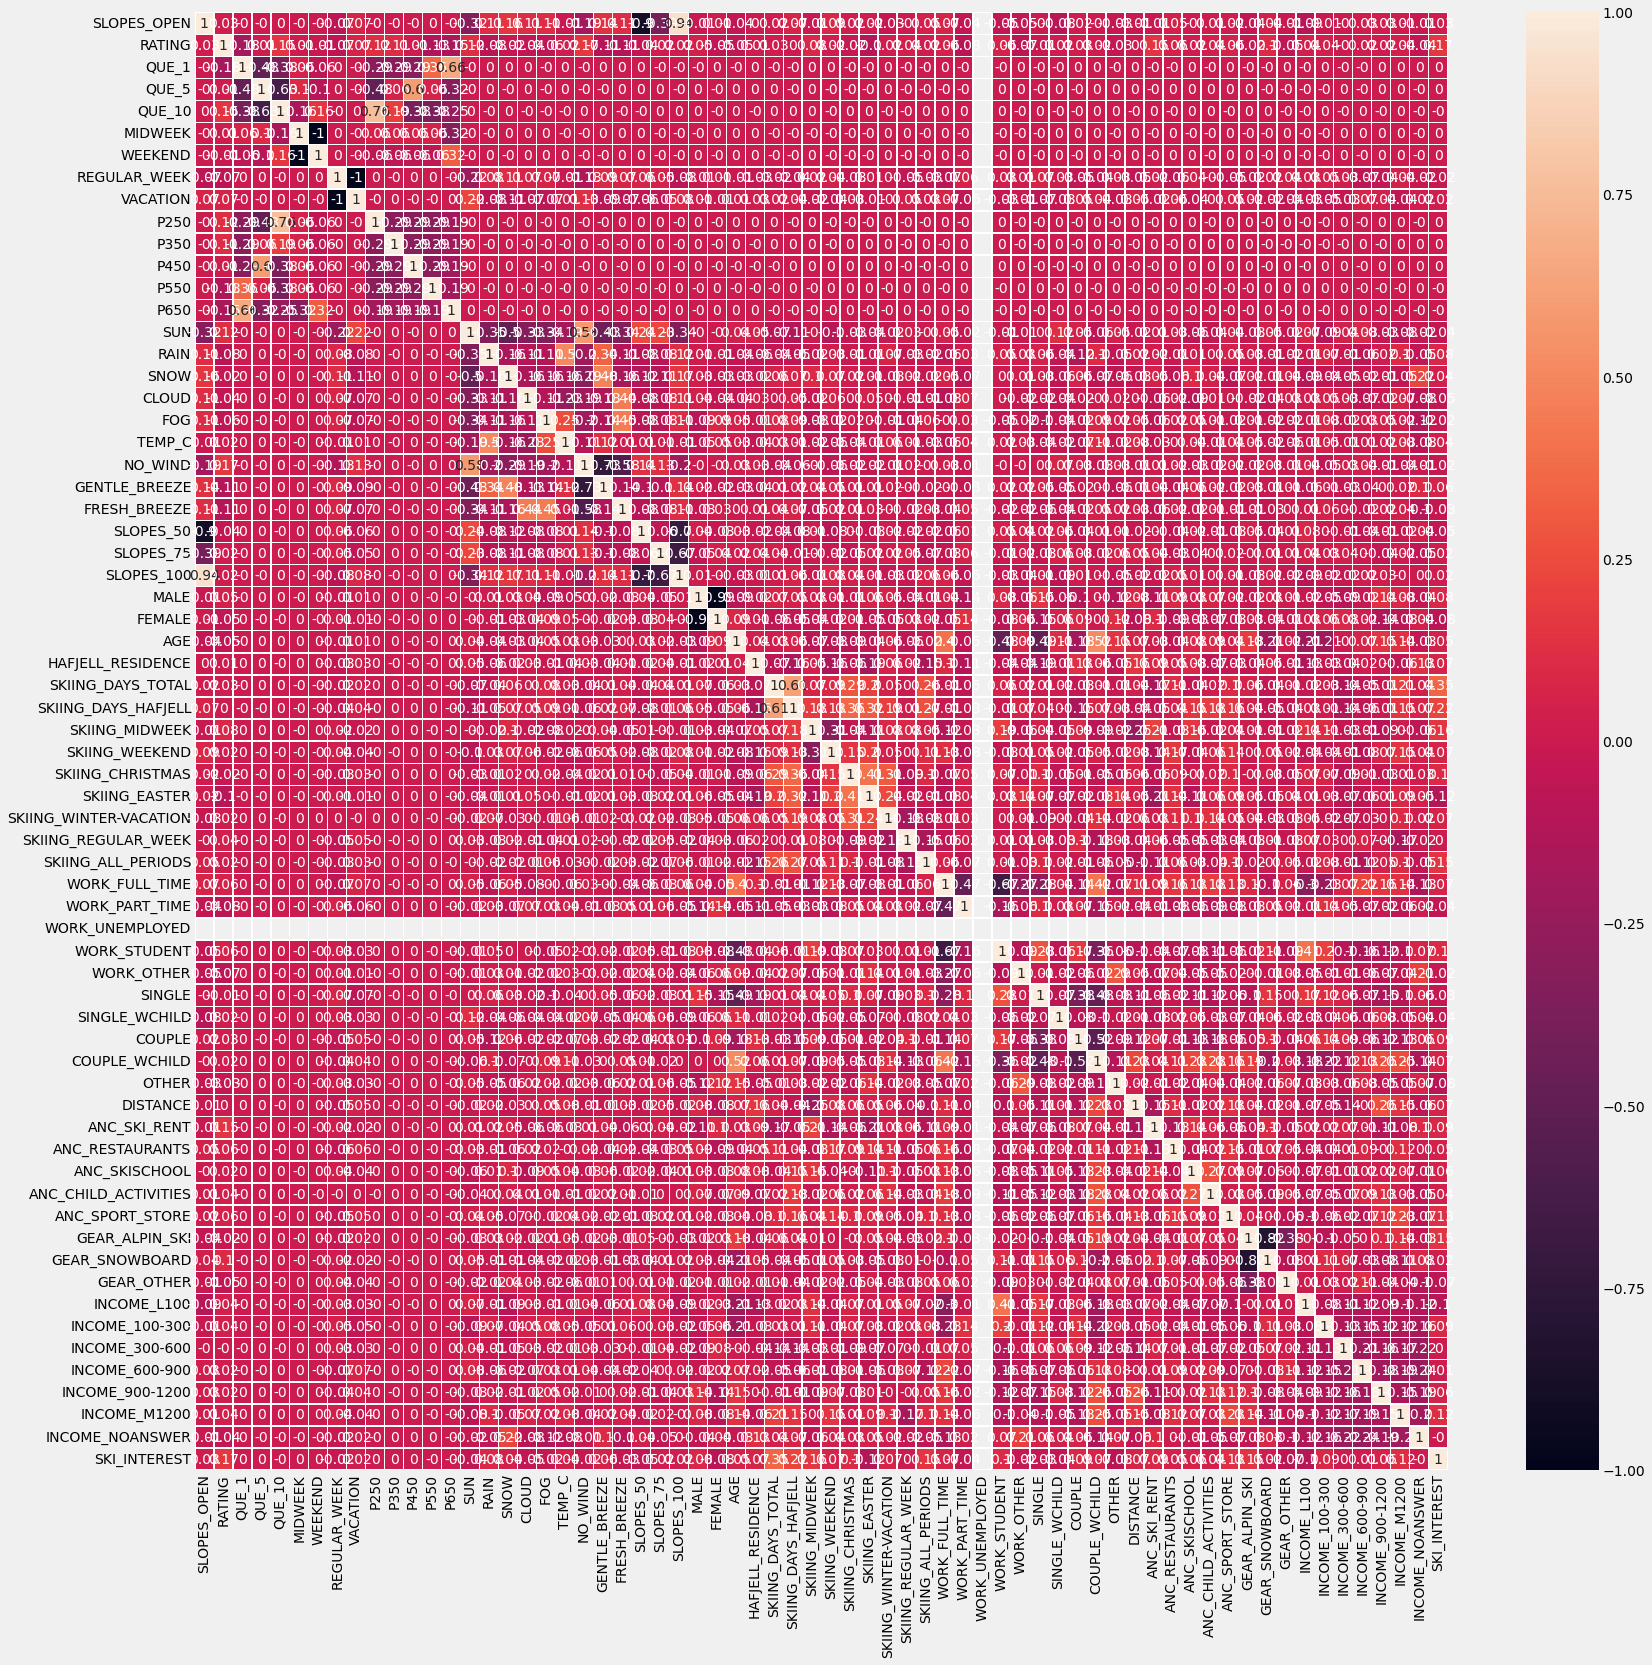

In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))  
# sns.heatmap(wx_df.corr(), annot=True, linewidths=0.5, ax=ax );
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(behavior_df.corr().round(2), annot=True, linewidths=0.5, ax=ax )


POSTIVE CORRELATIONS:
* WIND AND NO_WIND ARE HIGHLY CORRELATED (0.93) \{NO_WIND(1) = WIND("no wind") and GENTLE and FRESH are WIND(0)\} 
* TEMP_5C AND RAIN SIGNIFICANTLY CORRELATED (0.8) - yes there are some rows that reported rain and temp_5c. At that temp = it's not cold enough to snow (41F)  \{\{I will not drop bc they are 2 different kinds of weather, mutually exclusive\}\}
* WEATHER AND SUN SIGNIFICANTLY CORRELATED (0.81) \{same as wind and no wind above. Weather "sun" gets a 1 for SUN and all other weather (cloud, fog etc) got )s\}

CONSIDER DROPPING OR EDITING THESE 

**CAN DROP WIND, TEMP, WEATHER BC OTHER COLUMNS ARE THE ONE-HOT-ENCODES**

Defintely drop:
* wind
* weather

Keep TEMP_C bc those temps are mutually exclusive of other weather one-hot-encoded weather types

In [ ]:
#DROPPING CORRELATED/IRRELEVANT VARIABLES
behavior_df= behavior_df.drop(['TEMP_-20C','TEMP_-10C','TEMP_-5C','TEMP_0C','TEMP_5C','TEMP_-15C'], axis=1)

In [ ]:
behavior_df.head()


SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  \
0      -5        1              0             0          0          0   
1      -5        1              0             0          0          0   
2      -5        1              0             0          0          0   
3      -5        1              0             0          0          0   
4      -5        1              0             0          0          0   

   SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0           1     0       1   47                  2                  6   
1           1     0       1   47                  2                  6   
2           1     0       1   47                  2                  6   
3           1     0       1   47                  2                  6   
4           1     0       1   47                  2                  6   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    0               1               1                 0   
1                    0               1               1                 0   
2                    0               1               1                 0   
3                    0               1               1                 0   
4                    0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0         0             0                1              0   
1      0         0             0                1              0   
2      0         0             0                1              0   
3      0         0             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC

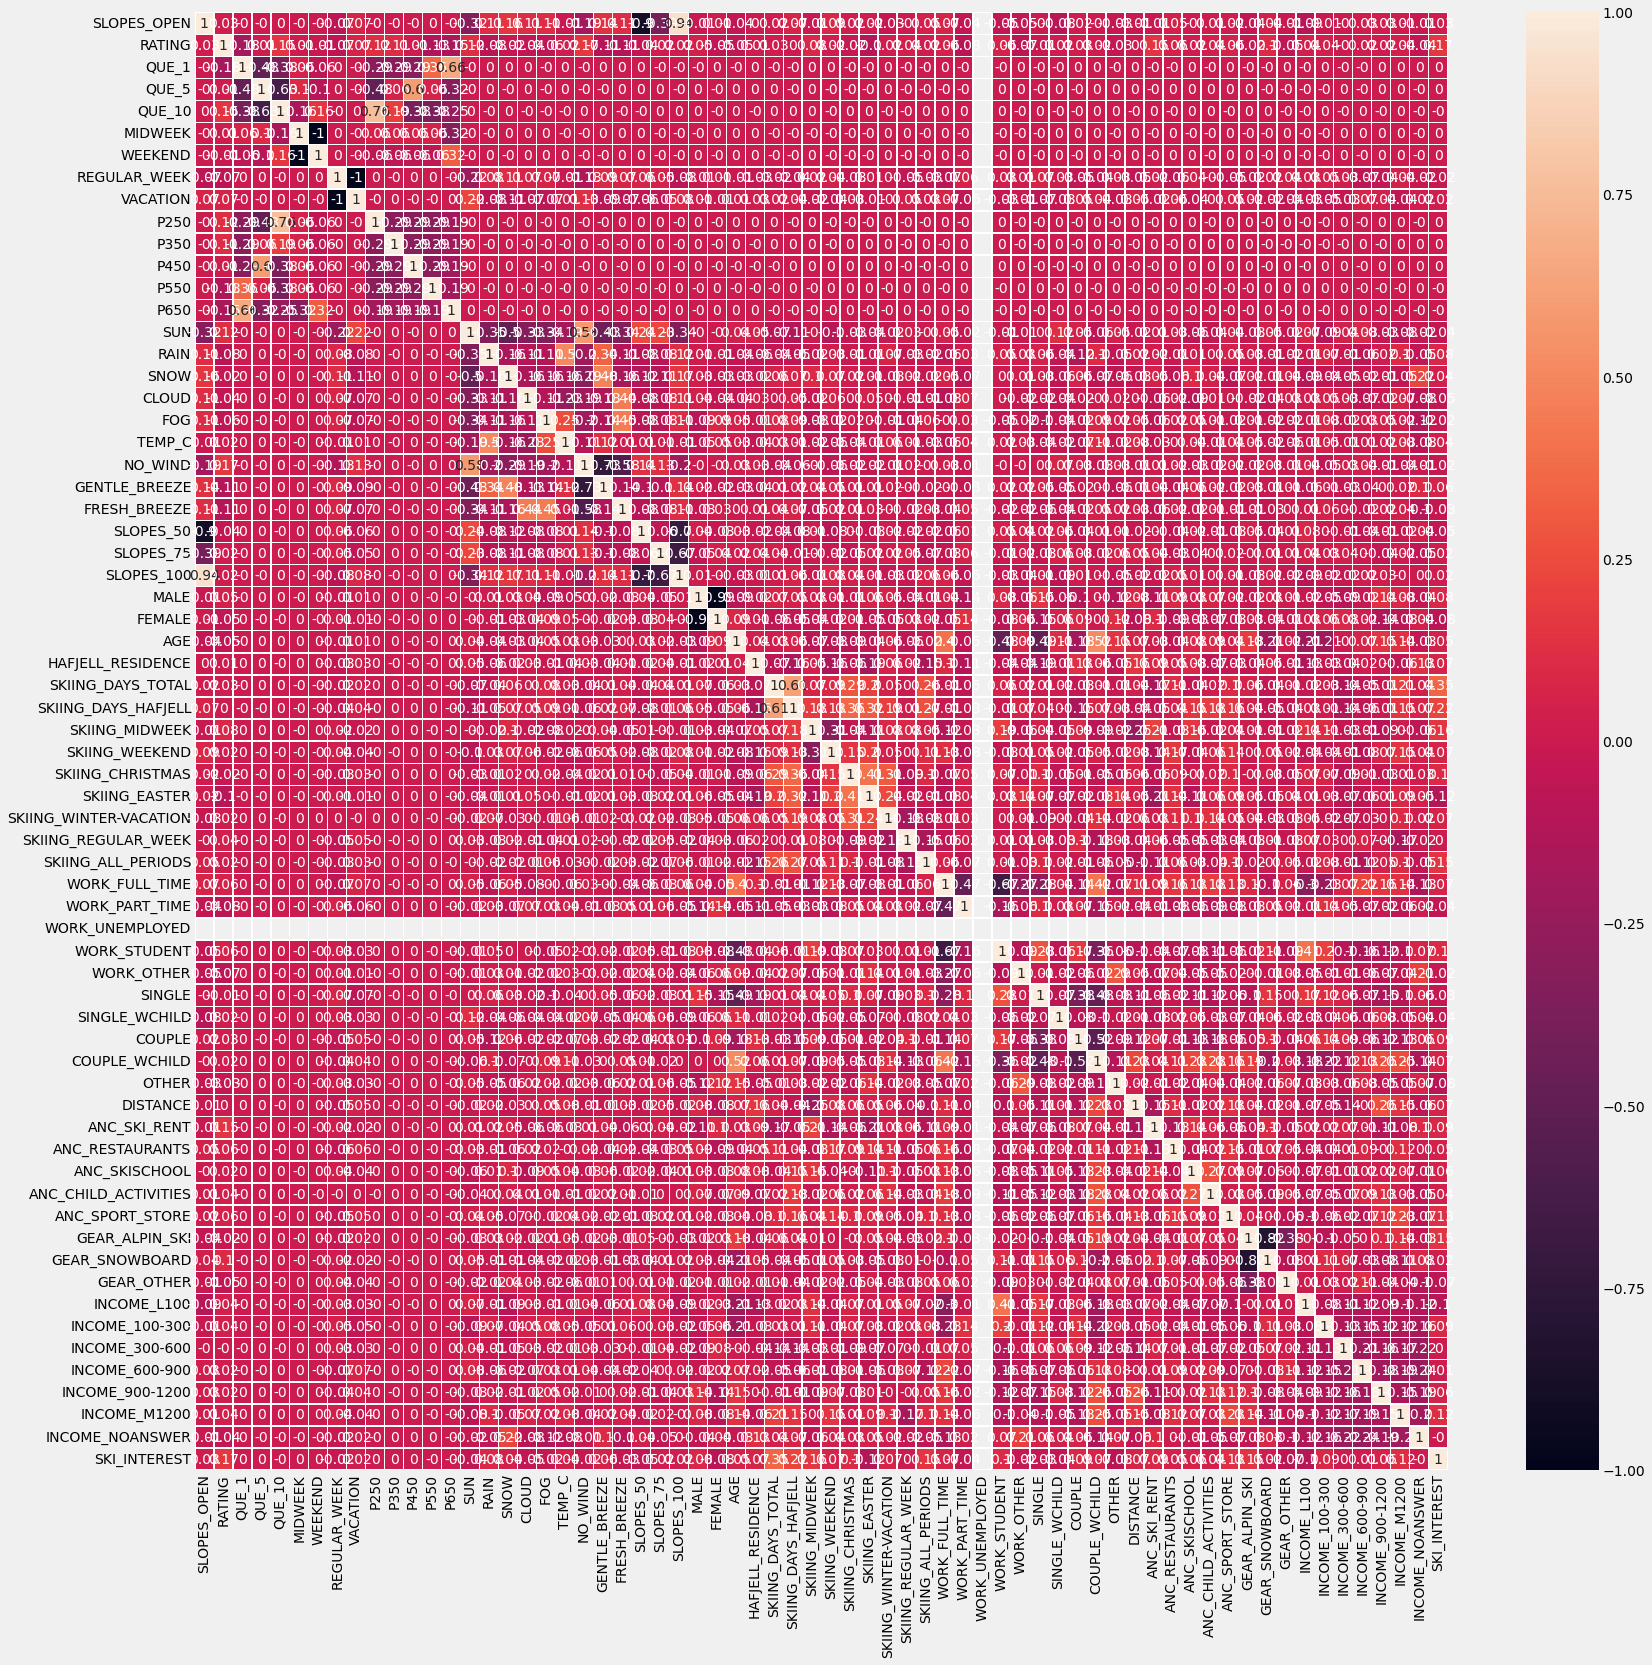

In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))  
# sns.heatmap(wx_df.corr(), annot=True, linewidths=0.5, ax=ax );
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(behavior_df.corr().round(2), annot=True, linewidths=0.5, ax=ax )

**DROPPED SPECIFIC TEMP NUMBERS AND JUST KEPT SUN RAIN SNOW ETC.**

**CORRELATIONS: <BR>
correlations look good. negatives are explanatory. removed the ones that were close to one (temps)**

In [ ]:
behavior_df.shape

(7182, 66)

In [ ]:
behavior_df.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  \
0      -5        1              0             0          0          0   
1      -5        1              0             0          0          0   
2      -5        1              0             0          0          0   
3      -5        1              0             0          0          0   
4      -5        1              0             0          0          0   

   SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0           1     0       1   47                  2                  6   
1           1     0       1   47                  2                  6   
2           1     0       1   47                  2                  6   
3           1     0       1   47                  2                  6   
4           1     0       1   47                  2                  6   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    0               1               1                 0   
1                    0               1               1                 0   
2                    0               1               1                 0   
3                    0               1               1                 0   
4                    0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0         0             0                1              0   
1      0         0             0                1              0   
2      0         0             0                1              0   
3      0         0             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC

In [ ]:
# DROPPING DUPES INSIDE behavior_df
behavior_droppeddupes = behavior_df.drop_duplicates()
behavior_droppeddupes.shape

#dropped 2430 rows


# added in TEMP_C and it went back to 7182 - no dupes?!

(7182, 66)

In [ ]:
behavior_droppeddupes.columns

Index(['SLOPES_OPEN', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10', 'MIDWEEK',
       'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350', 'P450', 'P550',
       'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG', 'TEMP_C', 'NO_WIND',
       'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75', 'SLOPES_100',
       'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE', 'SKIING_DAYS_TOTAL',
       'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK', 'SKIING_WEEKEND',
       'SKIING_CHRISTMAS', 'SKIING_EASTER', 'SKIING_WINTER-VACATION',
       'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS', 'WORK_FULL_TIME',
       'WORK_PART_TIME', 'WORK_UNEMPLOYED', 'WORK_STUDENT', 'WORK_OTHER',
       'SINGLE', 'SINGLE_WCHILD', 'COUPLE', 'COUPLE_WCHILD', 'OTHER',
       'DISTANCE', 'ANC_SKI_RENT', 'ANC_RESTAURANTS', 'ANC_SKISCHOOL',
       'ANC_CHILD_ACTIVITIES', 'ANC_SPORT_STORE', 'GEAR_ALPIN_SKI',
       'GEAR_SNOWBOARD', 'GEAR_OTHER', 'INCOME_L100', 'INCOME_100-300',
       'INCOME_300-600', 'INCOME_600-900', 'INCOME_900-1200',

# CHECK CORRELATION OF EVERYTHING


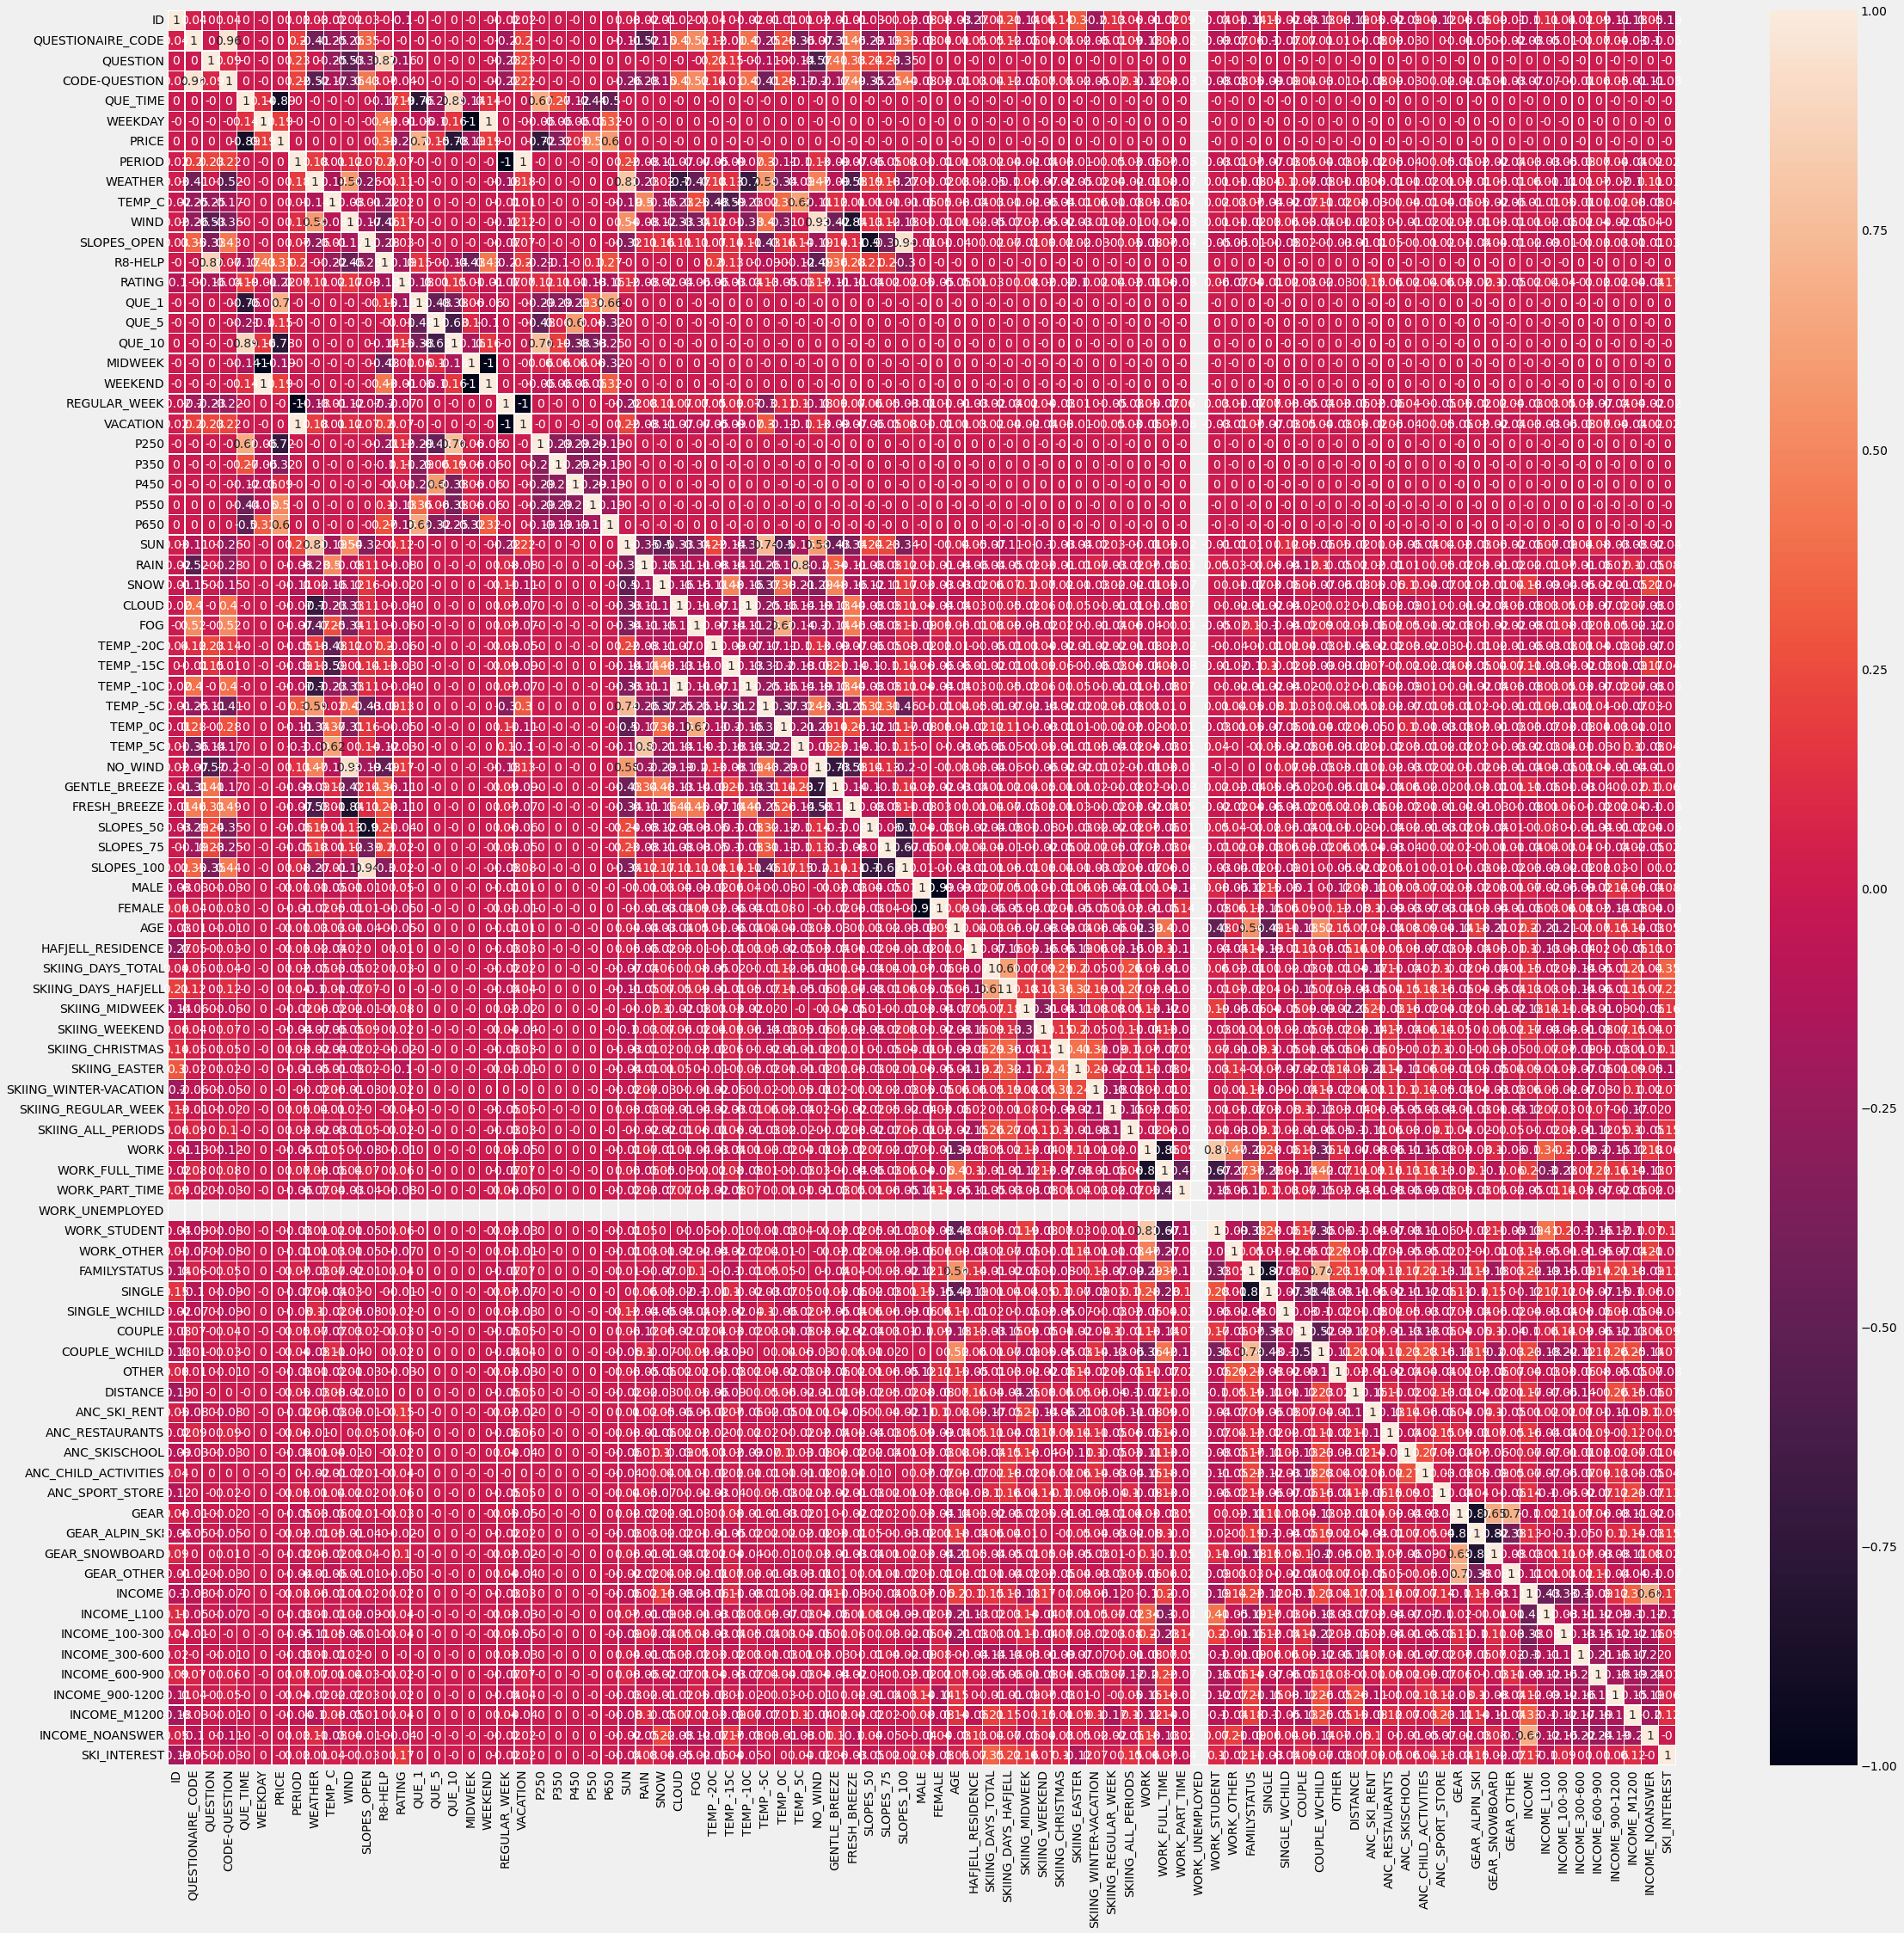

In [ ]:
fig, ax = plt.subplots(figsize=(35,35))  
sns.heatmap(all_data.corr().round(2), annot=True, linewidths=0.5, ax=ax )

In [ ]:
all_data.corr().round(2)

ID  QUESTIONAIRE_CODE  QUESTION  CODE-QUESTION  \
ID                      1.00               0.04      0.00           0.04   
QUESTIONAIRE_CODE       0.04               1.00      0.00           0.96   
QUESTION                0.00               0.00      1.00           0.09   
CODE-QUESTION           0.04               0.96      0.09           1.00   
QUE_TIME                0.00               0.00     -0.00           0.00   
WEEKDAY                -0.00              -0.00     -0.00          -0.00   
PRICE                   0.00               0.00      0.00           0.00   
PERIOD                  0.02               0.20      0.23           0.22   
WEATHER                 0.03              -0.41      0.00          -0.52   
TEMP_C                 -0.02              -0.25     -0.25          -0.17   
WIND                    0.02              -0.26     -0.53          -0.36   
SLOPES_OPEN             0.03               0.35     -0.33           0.43   
R8-HELP                -0.00              -0.00      0.87           0.07   
RATING                 -0.10              -0.00     -0.16          -0.04   
QUE_1                  -0.00              -0.00      0.00          -0.00   
QUE_5                  -0.00              -0.00      0.00          -0.00   
QUE_10                  0.00              -0.00     -0.00          -0.00   
MIDWEEK                -0.00              -0.00      0.00          -0.00   
WEEKEND                -0.00              -0.00     -0.00          -0.00   
REGULAR_WEEK           -0.02              -0.20     -0.23          -0.22   
VACATION                0.02               0.20      0.23           0.22   
P250                   -0.00              -0.00     -0.00          -0.00   
P350                    0.00              -0.00     -0.00          -0.00   
P450                   -0.00              -0.00     -0.00          -0.00   
P550                    0.00               0.00      0.00           0.00   
P650                    0.00               0.00      0.00           0.00   
SUN                     0.03              -0.11      0.00          -0.26   
RAIN                   -0.02              -0.52     -0.00          -0.28   
SNOW                   -0.01              -0.15     -0.00          -0.15   
CLOUD                  -0.02               0.40     -0.00           0.40   
FOG                    -0.00               0.52     -0.00           0.52   
TEMP_-20C               0.04               0.12      0.23           0.14   
TEMP_-15C               0.00              -0.01      0.15           0.01   
TEMP_-10C              -0.02               0.40     -0.00           0.40   
TEMP_-5C               -0.01              -0.25     -0.11          -0.41   
TEMP_0C                -0.01               0.28     -0.00           0.28   
TEMP_5C                 0.01              -0.36     -0.14          -0.17   
NO_WIND                 0.02              -0.07     -0.57          -0.20   
GENTLE_BREEZE          -0.01              -0.31      0.41          -0.17   
FRESH_BREEZE           -0.01               0.46      0.33           0.49   
SLOPES_50              -0.03              -0.29      0.24          -0.35   
SLOPES_75              -0.00              -0.19      0.23          -0.25   
SLOPES_100              0.02               0.35     -0.35           0.44   
MALE                   -0.08              -0.03      0.00          -0.03   
FEMALE                  0.08               0.04      0.00           0.03   
AGE                    -0.03               0.01      0.00          -0.01   
HAFJELL_RESIDENCE      -0.27               0.05     -0.00           0.03   
SKIING_DAYS_TOTAL       0.04               0.05      0.00           0.04   
SKIING_DAYS_HAFJELL     0.21               0.12      0.00           0.12   
SKIING_MIDWEEK         -0.14              -0.06     -0.00          -0.06   
SKIING_WEEKEND          0.06               0.04      0.00           0.07   
SKIING_CHRISTMAS        0.14               0.05      0.00           0.05  

# <font color = 'red'>UNSUPERVISED CLUSTERING MODELS</font>

In [ ]:
all_data.shape

(7182, 87)

In [ ]:
#check for dupes
all_data.duplicated().value_counts()
#NO DUPES - 7182 false's returned, no duplicates

False    7182
dtype: int64

In [ ]:
# DROPPING DUPES INSIDE all_data
all_data_droppeddupes = all_data.drop_duplicates()
all_data_droppeddupes.shape

(7182, 87)

Will start with a random sample of 90% of the defined and refined "behaviors list" - aka behavior_droppeddupes

# <font color = 'blue'> DEFINING X </FONT>

In [ ]:
# TAKING 80% OF ALL DATA
# X = behavior_df.sample(frac = 0.8)
# X.shape

### DO NOT RUN AGAIN ##
# X = behavior_droppeddupes.sample(frac = 0.80)
# X.shape

(5746, 66)

In [ ]:
#ALL OF X - NO SAMPLING
x = behavior_droppeddupes
x.shape

(7182, 66)

In [ ]:
# # TAKING 20% OF DATA FOR Y/TARGET IF NEEDED
# y = behavior_droppeddupes.sample(frac = 0.20)
# y.shape

# # 2d, not 1d like most y targets

In [ ]:
# Standardizing the X data features - scaling from std deviation
mmscaler = MinMaxScaler() 
X_scaled_mm = mmscaler.fit_transform(X)
X_scaled_mm

array([[1.        , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.85714286],
       [1.        , 0.1       , 0.        , ..., 0.        , 1.        ,
        0.14285714],
       [1.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.85714286],
       ...,
       [1.        , 0.4       , 1.        , ..., 0.        , 1.        ,
        0.85714286],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.57142857]])

In [ ]:
X_scaled_mm.shape

(5746, 66)

In [ ]:
# Standardizing the X data features - scaling from std deviation
mmscaler = MinMaxScaler() 
x_scaled_mm = mmscaler.fit_transform(x)
x_scaled_mm

array([[1.        , 0.9       , 0.        , ..., 1.        , 0.        ,
        0.71428571],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.71428571],
       [1.        , 0.2       , 0.        , ..., 1.        , 0.        ,
        0.71428571],
       ...,
       [1.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.28571429],
       [1.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.28571429],
       [1.        , 0.1       , 1.        , ..., 0.        , 0.        ,
        0.28571429]])

In [ ]:
x_scaled_mm.shape

(7182, 66)

**AFTER SEVERAL MODEL RUNS - I DETERMINED THAT MINMAX SCALING PRODUCED BEST RESULTS. WILL WORK WITH MINMAX SCALING FROM HERE FORWARD**

# K-MEANS CLUSTERING

# ELBOW METHOD TO DETERMINE CLUSTER #

In [ ]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 222,
}

# a list holds the SSE values for each k
sse_mm = []
for k in range(1,11):
  kmeans= KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(x_scaled_mm)
  sse_mm.append(kmeans.inertia_)

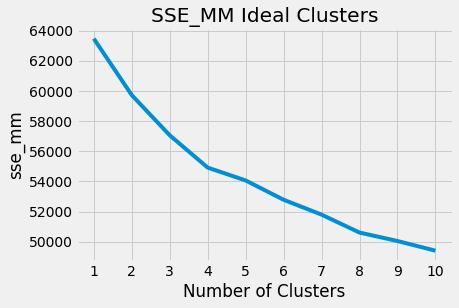

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse_mm)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("sse_mm")
plt.title("SSE_MM Ideal Clusters")
plt.show()

In [ ]:
kneelox = KneeLocator(
    range(1,11), sse_mm, curve='convex', direction='decreasing'
)
print("Suggested clusters for MM scaling:",kneelox.elbow)

Suggested clusters for MM scaling: 4


X at 80% - 6 clusters with 7182 rows including TEMP_C (5746 rows)

x at 100% - 4 clusters at 7182 rows including TEMP_C

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=222, n_init = 10, max_iter=500)

kmeans4 = KMeans(n_clusters=4, random_state=222, n_init = 10)

kmeans6 = KMeans(n_clusters=6, random_state=333, n_init = 10, max_iter = 501)

kmeans8 = KMeans(n_clusters=8, random_state=222, n_init = 10)

kmeans7 = KMeans(n_clusters=7, random_state=222, n_init = 10)

In [ ]:
## TRYING 4 CLUSTERS TOO FOR MM
cluster_km_mm4 = kmeans4.fit_predict(x_scaled_mm)
cluster_km_mm4

array([3, 0, 0, ..., 2, 2, 1], dtype=int32)

In [ ]:
## TRYING 4 CLUSTERS TOO FOR MM
cluster_km_mm4 = kmeans4.fit_predict(x_scaled_mm)
cluster_km_mm4

In [ ]:
## TRYING 5 CLUSTERS TOO FOR MM
cluster_km_mm5 = kmeans5.fit_predict(X_scaled_mm)
cluster_km_mm5

array([4, 3, 2, ..., 4, 4, 2], dtype=int32)

In [ ]:
cluster_km_mm6 = kmeans6.fit_predict(X_scaled_mm)
cluster_km_mm6

array([3, 3, 1, ..., 4, 1, 1], dtype=int32)

In [ ]:
cluster_km_mm7 = kmeans7.fit_predict(X_scaled_mm)
cluster_km_mm7

array([4, 6, 1, ..., 4, 4, 3], dtype=int32)

#PCA DIMENSIONALITY REDUCTION


In [ ]:
pca_km_mm = PCA(n_components=2).fit_transform(X_scaled_mm)
# pca_km -  2d array
pca_km_mm.shape

(5746, 2)

In [ ]:
pca_km4_mm = PCA(n_components=2).fit_transform(x_scaled_mm)
# pca_km -  2d array
pca_km4_mm.shape

(7182, 2)

# KMEANS ON PCA

In [ ]:
# 4 CLUSTERS ON MM
cluster4_pcakm_mm = kmeans4.fit_predict(pca_km4_mm) 
cluster4_pcakm_mm

array([3, 2, 2, ..., 0, 0, 1], dtype=int32)

In [ ]:
# 5 clusters with a model fit to X_scaled_mm that has been PCA'd
cluster5_pcakm_mm = kmeans5.fit_predict(pca_km_mm) 
cluster5_pcakm_mm

array([4, 1, 2, ..., 0, 0, 3], dtype=int32)

In [ ]:
# 6 clusters with a model fit to X_scaled_mm that has been PCA'd
cluster6_pcakm_mm = kmeans6.fit_predict(pca_km_mm) 
cluster6_pcakm_mm

array([0, 2, 1, ..., 0, 1, 4], dtype=int32)

In [ ]:
# 7 clusters with a model fit to x_scaled_mm that has been PCA'd
cluster7_pcakm_mm = kmeans7.fit_predict(pca_km7_mm) 
cluster7_pcakm_mm

array([4, 5, 5, ..., 6, 6, 3], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_ ## from elbow defined
centroids6 = kmeans6.cluster_centers_ ## from 6 clusters
#centroids7 = kmeans7.cluster_centers_
centroids4 = kmeans4.cluster_centers_
#centroids5 = kmeans5.cluster_centers_

In [ ]:
km_sil_pca_mm4 = metrics.silhouette_score(pca_km4_mm, cluster4_pcakm_mm, metric='euclidean')
km_sil_pca_mm4

0.47260597869029514

In [ ]:
km_sil_pca_mm5 = metrics.silhouette_score(pca_km_mm, cluster5_pcakm_mm, metric='euclidean')
km_sil_pca_mm5

0.42331857842424647

In [ ]:
km_sil_pca_mm6 = metrics.silhouette_score(pca_km_mm, cluster6_pcakm_mm, metric='euclidean')
km_sil_pca_mm6

0.4025051746680683

In [ ]:
km_sil_pca_mm7 = metrics.silhouette_score(pca_km7_mm, cluster7_pcakm_mm, metric='euclidean')
km_sil_pca_mm7

0.3817959900895876

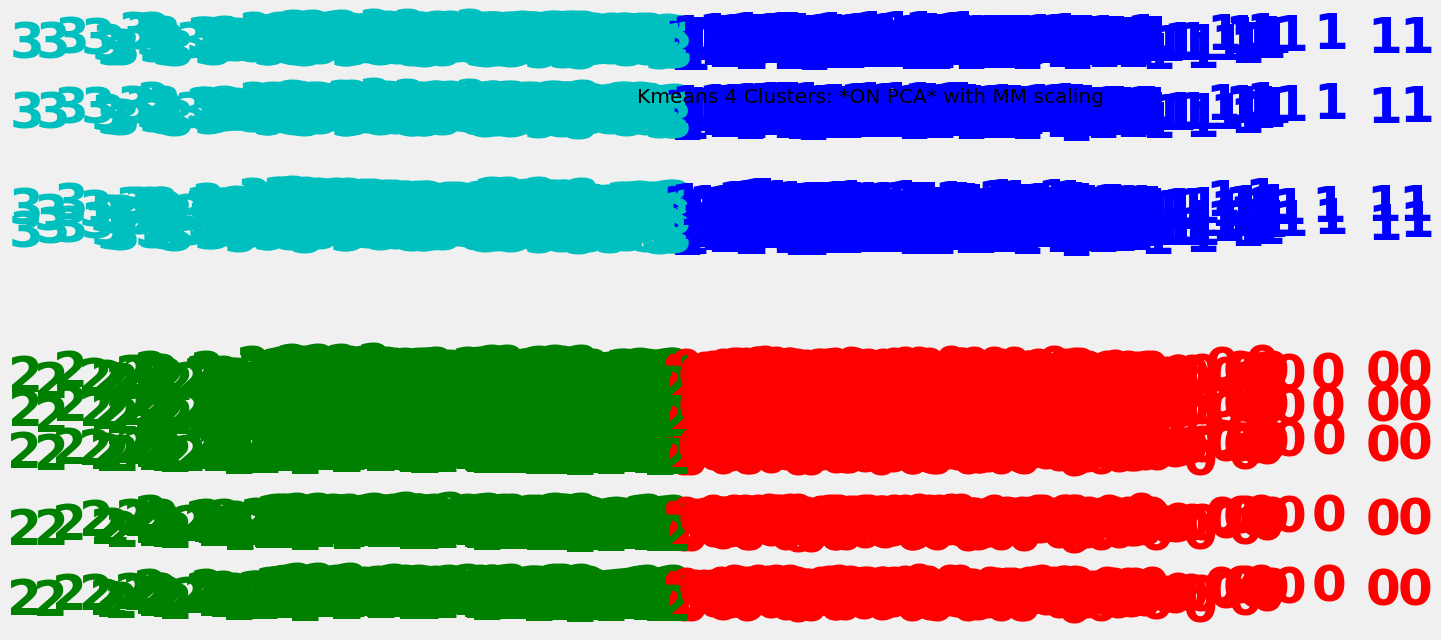

In [ ]:
# PLOT KMEANS DONE ON PCA_KM_MM INSTEAD OF KMEANS ON X_SCALED - 6 clusters
#plt.figure(figsize=(10,5))
colours = "r","b","g","c","m","y","k","burlywood","chartreuse"
for i in range(pca_km4_mm.shape[0]):
    plt.text(pca_km4_mm[i, 0], pca_km4_mm[i, 1], str(cluster4_pcakm_mm[i]),
             color=colours[cluster4_pcakm_mm[i]],
             fontdict={'weight': 'bold', 'size':50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title("Kmeans 4 Clusters: *ON PCA* with MM scaling")
plt.show()

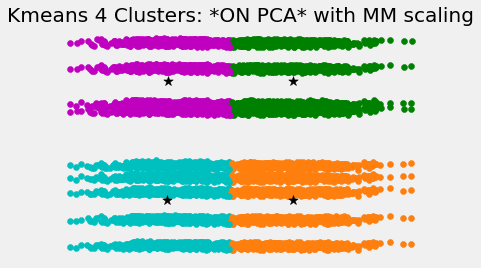

In [ ]:
# SCATTER PLOT DATA WITH COLOR
#plt.figure(figsize=(10,5))
colours = "tab:orange","g","c","m","y",'r',"burlywood","chartreuse", 'k'
for i in range(pca_km4_mm.shape[0]):
    plt.scatter(pca_km4_mm[i, 0], pca_km4_mm[i, 1], color=colours[cluster4_pcakm_mm[i]])
plt.scatter(centroids4[:,0], centroids4[:,1], color = "black",marker = "*", s=100)
plt.xticks([])
plt.yticks([])
#plt.axis('off')
plt.title("Kmeans 4 Clusters: *ON PCA* with MM scaling")
plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
# plt.scatter(pca_km_mm[:, 0], pca_km_mm[:, 1]) #plot every row, value col 1 against every row, value col 2
# plt.scatter(centroids5[:,0], centroids5[:,1], color = "red",marker = "*", s=100)
# plt.xticks([])
# plt.yticks([])
# #plt.axis('off')
# plt.title("ScatterPlot: 5 Clusters with MM Scaling WITH KMEANS DONE ON PCA - NO COLOR")
# plt.show()

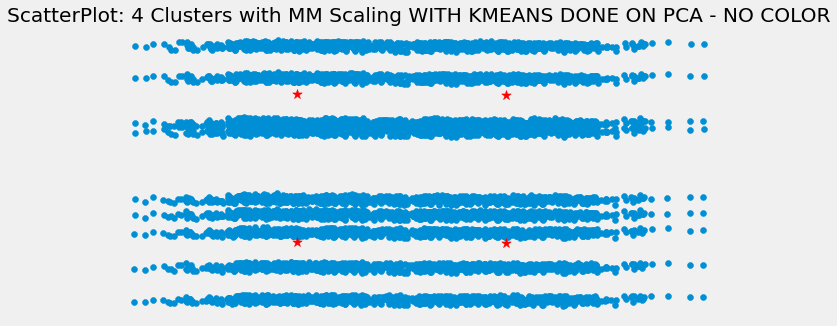

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_km4_mm[:, 0], pca_km4_mm[:, 1]) #plot every row, value col 1 against every row, value col 2
plt.scatter(centroids4[:,0], centroids4[:,1], color = "red",marker = "*", s=100)
plt.xticks([])
plt.yticks([])
#plt.axis('off')
plt.title("ScatterPlot: 4 Clusters with MM Scaling WITH KMEANS DONE ON PCA - NO COLOR")
plt.show()


# GMM TESTS

In [ ]:
# Defining the GMM model object
gmm_cluster6 = GaussianMixture(n_components=6, random_state=123, covariance_type="full")

# # Fit model
# clusters_gmm_6 = gmm_cluster.fit_predict(X_scaled_mm)
# cluster6_gmm = gmm_cluster.fit_predict(X_scaled_mm)

In [ ]:
gmm_cluster4= GaussianMixture(n_components=4, random_state=123, covariance_type="full")

In [ ]:
# #GMM TIED
gmm_cluster_tied = GaussianMixture(n_components=4, random_state=123, covariance_type="tied")

# GOING TO USE THIS MODEL AS IT PRODUCED HIGHEST SIL SCORE

In [ ]:
# # Defining the agglomerative clustering
gmm_cluster_diag = GaussianMixture(n_components=4, random_state=123, covariance_type="diag")


In [ ]:
# # GMM Spherical
gmm_cluster_spherical = GaussianMixture(n_components=4, random_state=123, covariance_type="spherical")

#PCA

In [ ]:
pca_gmm4 = PCA(n_components=2).fit_transform(x_scaled_mm)

In [ ]:
pca_gmm = PCA(n_components=2).fit_transform(X_scaled_mm)

In [ ]:
# FIT THE MODEL OBJECT TO THE PCA VERSION
cluster4_pca_gmm_f = gmm_cluster4.fit_predict(pca_gmm4)

In [ ]:
cluster4_pca_gmm_t = gmm_cluster_tied.fit_predict(pca_gmm)

In [ ]:
cluster4_pca_gmm_d = gmm_cluster_diag.fit_predict(pca_gmm)

In [ ]:
cluster4_pca_gmm_s = gmm_cluster_spherical.fit_predict(pca_gmm)

In [ ]:
cluster6_pca_gmm_f = gmm_cluster6.fit_predict(pca_gmm)

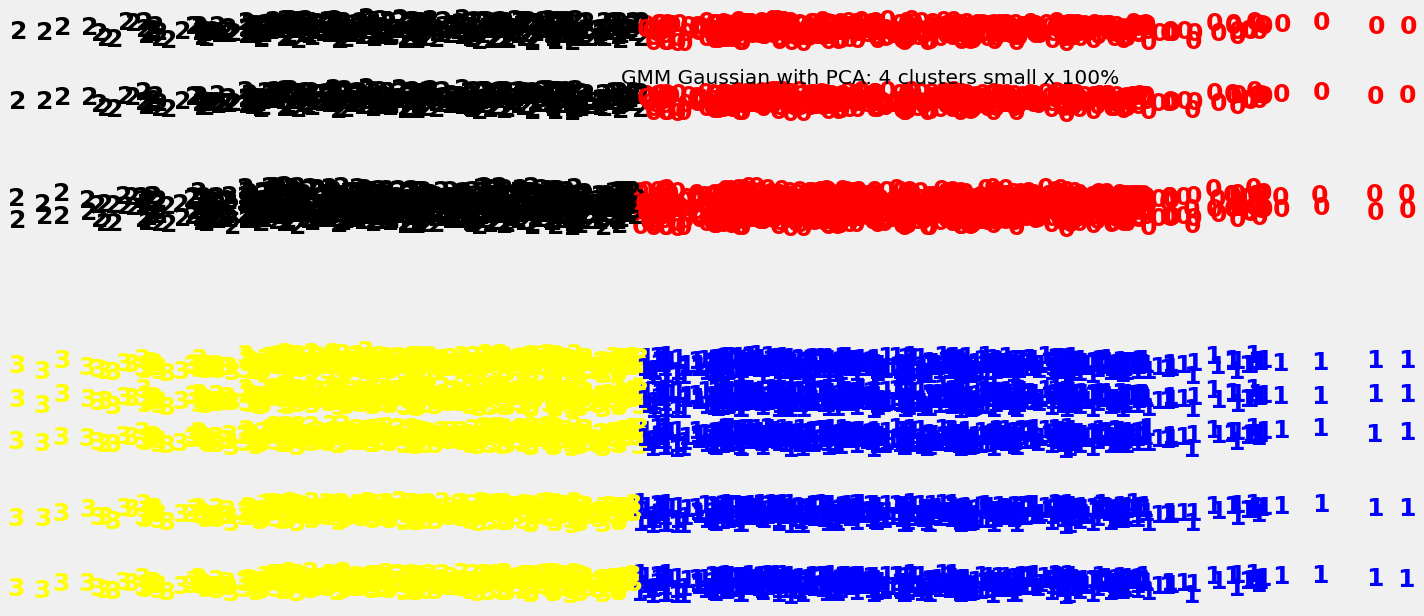

In [ ]:
#plt.figure(figsize=(10,5))
colours = ('red','blue','black','yellow','orange','green','purple','cyan','magenta','tab:purple','tab:orange')
for i in range(pca_gmm4.shape[0]):
    plt.text(pca_gmm4[i, 0], pca_gmm4[i, 1], str(cluster4_pca_gmm_f[i]),
            c = colours[cluster4_pca_gmm_f[i]],
             fontdict={'weight': 'bold', 'size': 25}
        )

plt.xticks([])
plt.yticks([])
plt.title("GMM Gaussian with PCA: 4 clusters small x 100%")
plt.axis('off')
plt.show()

In [ ]:
import scipy.stats
from sklearn import mixture 
# for making CENTERS in GMM
gmm_cluster_cnt= mixture.GaussianMixture(n_components=4, covariance_type='full').fit(pca_gmm4) 
## CLUSTER CENTERS ONLY WORK WITH FULL, NOT 'TIED'

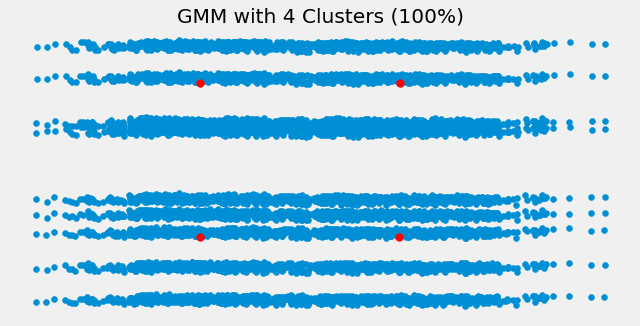

In [ ]:
#gmm_cluster_cnt= mixture.GaussianMixture(n_components=6, covariance_type='full').fit(pca_gmm4) 
centers = np.empty(shape=(gmm_cluster_cnt.n_components, pca_gmm4.shape[1]))

for i in range(gmm_cluster_cnt.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm_cluster_cnt.covariances_[i], mean=gmm_cluster_cnt.means_[i]).logpdf(pca_gmm4)
    centers[i, :] = pca_gmm4[np.argmax(density)]

plt.figure(figsize=(10,5))
plt.scatter(pca_gmm4[:, 0], pca_gmm4[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], s=60, color='red')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title("GMM with 4 Clusters (100%)")
plt.show()

In [ ]:
gmm_sil_pca_full = metrics.silhouette_score(pca_gmm,cluster6_pca_gmm_f, metric='euclidean')
gmm_sil_pca_full

0.3977270865036778

In [ ]:
gmm_sil_pca4_full = metrics.silhouette_score(pca_gmm4,cluster4_pca_gmm_f, metric='euclidean')
gmm_sil_pca4_full

0.47254534166970313

In [ ]:
gmm_sil_tied = metrics.silhouette_score(pca_gmm, cluster4_pca_gmm_t, metric='euclidean')
gmm_sil_tied

0.4749795647380486

In [ ]:
gmm_sil_diag = metrics.silhouette_score(pca_gmm, cluster4_pca_gmm_d, metric='euclidean')
gmm_sil_diag

0.47446895754107893

In [ ]:
gmm_sil_spherical = metrics.silhouette_score(pca_gmm, cluster4_pca_gmm_s, metric='euclidean')
gmm_sil_spherical

0.47497321398850445

<font color='purple'>**4 clusters determined**

Append back to all_data  </font>

In [ ]:
#make labels
kmeans4.labels_

array([1, 3, 3, ..., 0, 0, 2], dtype=int32)

In [ ]:
gmm_cluster7.fit(x_scaled_mm)

GaussianMixture(n_components=7, random_state=123)

In [ ]:
gmmlabels = gmm_cluster7.predict(x_scaled_mm)
gmmlabels.shape

(6900,)

In [ ]:
kmeans4_labels = pd.DataFrame(kmeans4.labels_)
kmeans4_labels['CLUSTER_ID'] = kmeans4_labels
kmeans4_labels.head(10)

0  CLUSTER_ID
0  1           1
1  3           3
2  3           3
3  3           3
4  1           1
5  1           1
6  3           3
7  3           3
8  1           1
9  1           1

In [ ]:
gmm_labels = pd.DataFrame(gmmlabels)
gmm_labels['CLUSTER_ID'] = gmmlabels
gmm_labels.head()
gmm_labels.shape

(6900, 2)

In [ ]:
gmm_labels_df2=gmm_labels.drop(gmm_labels.columns[0], axis=1)
gmm_labels_df2.shape

(6900, 1)

In [ ]:
kmeans4_labels = pd.DataFrame(kmeans4.labels_)
kmeans4_labels['CLUSTER_ID'] = kmeans4_labels
kmeans4_labels.head()

0  CLUSTER_ID
0  1           1
1  3           3
2  3           3
3  3           3
4  1           1

In [ ]:
kmeans4_labels_df2=kmeans4_labels.drop(kmeans4_labels.columns[0], axis=1)
kmeans4_labels_df2.shape

(7182, 1)

In [ ]:
kmeans4_labels.value_counts().sort_values(ascending=False)

0  CLUSTER_ID
0  0             2165
3  3             1825
2  2             1732
1  1             1460
dtype: int64

In [ ]:
gmm_labels_df2.value_counts().sort_values(ascending=False)

CLUSTER_ID
2             1666
4             1123
0              936
6              861
5              834
3              759
1              721
dtype: int64

In [ ]:
gmm_labels_df2.isna().sum()

CLUSTER_ID    0
dtype: int64

In [ ]:
X.head() 
#THIS IS BASICALLY BEHAVIORS_LIST
#all_data.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0       0      1      0       0        0        1             1   
1          1.0      90      0      0       1        0        1             1   
2          0.5      25      0      1       0        1        0             1   
3          1.0      10      0      0       1        0        1             1   
4          1.0      20      1      0       0        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     0     0     0     0     1    0     0     1      0    0   
1         0     0     1     0     0     0    0     0     0      1    0   
2         0     0     1     0     0     0    1     0     0      0    0   
3         0     1     0     0     0     0    1     0     0      0    0   
4         0     0     0     0     0     1    0     0     0      1    0   

   NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  SLOPES_100  \
0        0              1             0          0          0           1   
1        1              0             0          0          0           1   
2        1              0             0          1          0           0   
3        1              0             0          0          0           1   
4        0              0             1          0          0           1   

   MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0     1       0   42                  2                  5   
1     1       0   16                  4                  7   
2     0       1   42                  0                 10   
3     1       0   23                  0                  6   
4     1       0   30                  2                  3   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    5               1               0                 0   
1                    2               0               1                 0   
2                    0               0               0                 0   
3                    6               0               1                 1   
4                    1               0               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       0                    0   
1              0                       1                    0   
2              0                       0                    0   
3              1                       1                    0   
4              0                       0                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               0               0                0   
2                   0               0               1                0   
3                   0               0               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             1           0       1              0       0              0   
2             0           0       0              0       1              0   
3             1           0       0              0       1              0   
4             0           0       1              0       0              0   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0       350             1                0              0   
1      0       250             0                1              0   
2      0         0             0                1              0   
3      0        15             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC_SPORT_STORE  GEAR_ALPIN_SKI  GEAR_SNOWBOARD  \


In [ ]:
X.reset_index(inplace=True)
X



index  SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  \
0      4067          1.0       0      1      0       0        0        1   
1      1751          1.0      90      0      0       1        0        1   
2       766          0.5      25      0      1       0        1        0   
3      6700          1.0      10      0      0       1        0        1   
4      2069          1.0      20      1      0       0        0        1   
...     ...          ...     ...    ...    ...     ...      ...      ...   
5515   2171          0.5      50      0      1       0        1        0   
5516   5544          1.0      50      0      0       1        1        0   
5517   2094          1.0      80      0      1       0        0        1   
5518   4959          1.0      80      0      0       1        1        0   
5519    465          1.0      70      0      1       0        0        1   

      REGULAR_WEEK  VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  \
0                1         0     0     0     0     0     1    0     0     1   
1                1         0     0     1     0     0     0    0     0     0   
2                1         0     0     1     0     0     0    1     0     0   
3                1         0     1     0     0     0     0    1     0     0   
4                1         0     0     0     0     0     1    0     0     0   
...            ...       ...   ...   ...   ...   ...   ...  ...   ...   ...   
5515             1         0     0     0     1     0     0    1     0     0   
5516             1         0     1     0     0     0     0    1     0     0   
5517             1         0     0     0     1     0     0    1     0     0   
5518             0         1     1     0     0     0     0    1     0     0   
5519             1         0     0     0     1     0     0    0     0     0   

      CLOUD  FOG  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  \
0         0    0        0              1             0          0          0   
1         1    0        1              0             0          0          0   
2         0    0        1              0             0          1          0   
3         0    0        1              0             0          0          0   
4         1    0        0              0             1          0          0   
...     ...  ...      ...            ...           ...        ...        ...   
5515      0    0        1              0             0          1          0   
5516      0    0        1              0             0          0          0   
5517      0    0        1              0             0          0          0   
5518      0    0        1              0             0          0          0   
5519      1    0        0              0             1          0          0   

      SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0              1     1       0   42                  2                  5   
1              1     1       0   16                  4                  7   
2              0     0       1   42                  0                 10   
3              1     1       0   23                  0                  6   
4              1     1       0   30                  2                  3   
...          ...   ...     ...  ...                ...                ...   
5515           0     0       1   49                  2                  5   
5516           1     0       1   26                  3                  2   
5517           1     0       1   24                  2                  5   
5518           1     1       0   28                  2                  4   
5519           1     1       0   49                  0                 20   

      SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                       5               1               0                 0   
1                       2               0               1                 0   
2                    

In [ ]:
X.drop('index', inplace=True, axis=1)
#X.drop('level_0', inplace=True, axis=1)
X.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0       0      1      0       0        0        1             1   
1          1.0      90      0      0       1        0        1             1   
2          0.5      25      0      1       0        1        0             1   
3          1.0      10      0      0       1        0        1             1   
4          1.0      20      1      0       0        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     0     0     0     0     1    0     0     1      0    0   
1         0     0     1     0     0     0    0     0     0      1    0   
2         0     0     1     0     0     0    1     0     0      0    0   
3         0     1     0     0     0     0    1     0     0      0    0   
4         0     0     0     0     0     1    0     0     0      1    0   

   NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  SLOPES_100  \
0        0              1             0          0          0           1   
1        1              0             0          0          0           1   
2        1              0             0          1          0           0   
3        1              0             0          0          0           1   
4        0              0             1          0          0           1   

   MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0     1       0   42                  2                  5   
1     1       0   16                  4                  7   
2     0       1   42                  0                 10   
3     1       0   23                  0                  6   
4     1       0   30                  2                  3   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    5               1               0                 0   
1                    2               0               1                 0   
2                    0               0               0                 0   
3                    6               0               1                 1   
4                    1               0               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       0                    0   
1              0                       1                    0   
2              0                       0                    0   
3              1                       1                    0   
4              0                       0                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               0               0                0   
2                   0               0               1                0   
3                   0               0               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             1           0       1              0       0              0   
2             0           0       0              0       1              0   
3             1           0       0              0       1              0   
4             0           0       1              0       0              0   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0       350             1                0              0   
1      0       250             0                1              0   
2      0         0             0                1              0   
3      0        15             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC_SPORT_STORE  GEAR_ALPIN_SKI  GEAR_SNOWBOARD  \


In [ ]:

# ADDING THESE BACK TO X IS ADDING THE LABELS BACK TO BEHAVIORS LIST AND NOT ALL_DATA

clustered_X= pd.concat([X, kmeans6_labels_df2], axis=1)
clustered_X.shape  



# why are there more rows and only col and why is it full of nans now ? because random sample of X  - there were empty rows via index

NameError: ignored

#append labels to master data  - check indices  - prob appending to behavior_droppeddupes

In [ ]:
# ADDING CLUSTER LABELS TO ALL_DATA - WATCH THE INDICES
all_data.shape

(7182, 87)

In [ ]:
clustered_X.head()
#clustered_X.shape  # 5520x66

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0       0      1      0       0        0        1             1   
1          1.0      90      0      0       1        0        1             1   
2          0.5      25      0      1       0        1        0             1   
3          1.0      10      0      0       1        0        1             1   
4          1.0      20      1      0       0        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     0     0     0     0     1    0     0     1      0    0   
1         0     0     1     0     0     0    0     0     0      1    0   
2         0     0     1     0     0     0    1     0     0      0    0   
3         0     1     0     0     0     0    1     0     0      0    0   
4         0     0     0     0     0     1    0     0     0      1    0   

   NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  SLOPES_100  \
0        0              1             0          0          0           1   
1        1              0             0          0          0           1   
2        1              0             0          1          0           0   
3        1              0             0          0          0           1   
4        0              0             1          0          0           1   

   MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0     1       0   42                  2                  5   
1     1       0   16                  4                  7   
2     0       1   42                  0                 10   
3     1       0   23                  0                  6   
4     1       0   30                  2                  3   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    5               1               0                 0   
1                    2               0               1                 0   
2                    0               0               0                 0   
3                    6               0               1                 1   
4                    1               0               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       0                    0   
1              0                       1                    0   
2              0                       0                    0   
3              1                       1                    0   
4              0                       0                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               0               0                0   
2                   0               0               1                0   
3                   0               0               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             1           0       1              0       0              0   
2             0           0       0              0       1              0   
3             1           0       0              0       1              0   
4             0           0       1              0       0              0   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0       350             1                0              0   
1      0       250             0                1              0   
2      0         0             0                1              0   
3      0        15             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC_SPORT_STORE  GEAR_ALPIN_SKI  GEAR_SNOWBOARD  \


In [ ]:
kmeans4_labels_df2.head()
kmeans4_labels_df2.shape  # 7182 x 1

(7182, 1)

In [ ]:
#all_data.shape  #7182x87
all_data.head()

ID  QUESTIONAIRE_CODE  QUESTION  CODE-QUESTION  QUE_TIME  WEEKDAY  PRICE  \
0   1                  2         8              2        10        0    250   
1   1                  2         8              2         5        0    350   
2   1                  2         8              2         5        0    450   
3   1                  2         8              2         1        0    550   
4   1                  2         8              2        10        1    250   

   PERIOD  WEATHER  TEMP_C  WIND  SLOPES_OPEN  R8-HELP  RATING  QUE_1  QUE_5  \
0       0        4      -5     2          1.0        0      90      0      0   
1       0        4      -5     2          1.0        1     100      0      1   
2       0        4      -5     2          1.0        2      20      0      1   
3       0        4      -5     2          1.0        3      10      1      0   
4       0        4      -5     2          1.0        4      90      0      0   

   QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  VACATION  P250  P350  P450  P550  \
0       1        1        0             1         0     1     0     0     0   
1       0        1        0             1         0     0     1     0     0   
2       0        1        0             1         0     0     0     1     0   
3       0        1        0             1         0     0     0     0     1   
4       1        0        1             1         0     1     0     0     0   

   P650  SUN  RAIN  SNOW  CLOUD  FOG  TEMP_-20C  TEMP_-15C  TEMP_-10C  \
0     0    1     0     0      0    0          0          0          0   
1     0    1     0     0      0    0          0          0          0   
2     0    1     0     0      0    0          0          0          0   
3     0    1     0     0      0    0          0          0          0   
4     0    1     0     0      0    0          0          0          0   

   TEMP_-5C  TEMP_0C  TEMP_5C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  \
0         1        0        0        1              0             0   
1         1        0        0        1              0             0   
2         1        0        0        1              0             0   
3         1        0        0        1              0             0   
4         1        0        0        1              0             0   

   SLOPES_50  SLOPES_75  SLOPES_100  MALE  FEMALE   AGE  HAFJELL_RESIDENCE  \
0          0          0           1   0.0       1  47.0                2.0   
1          0          0           1   0.0       1  47.0                2.0   
2          0          0           1   0.0       1  47.0                2.0   
3          0          0           1   0.0       1  47.0                2.0   
4          0          0           1   0.0       1  47.0                2.0   

   SKIING_DAYS_TOTAL  SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  \
0                6.0                  0.0               1               1   
1                6.0                  0.0               1               1   
2                6.0                  0.0               1               1   
3                6.0                  0.0               1               1   
4                6.0                  0.0               1               1   

   SKIING_CHRISTMAS  SKIING_EASTER  SKIING_WINTER-VACATION  \
0                 0              0                       1   
1                 0              0                       1   
2                 0              0                       1   
3                 0              0                       1   
4                 0              0                       1   

   SKIING_REGULAR_WEEK  SKIING_ALL_PERIODS  WORK  WORK_FULL_TIME  \
0                    0                   0   0.0               1   
1                    0                   0   0.0               1   
2                    0                   0   0.0               1   
3                    0                   0   0.0               1   
4                    0                   0   0.0             

In [ ]:
behavior_droppeddupes.shape

(7182, 66)

In [ ]:
behavior_droppeddupes.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  \
0      -5        1              0             0          0          0   
1      -5        1              0             0          0          0   
2      -5        1              0             0          0          0   
3      -5        1              0             0          0          0   
4      -5        1              0             0          0          0   

   SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0           1     0       1   47                  2                  6   
1           1     0       1   47                  2                  6   
2           1     0       1   47                  2                  6   
3           1     0       1   47                  2                  6   
4           1     0       1   47                  2                  6   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    0               1               1                 0   
1                    0               1               1                 0   
2                    0               1               1                 0   
3                    0               1               1                 0   
4                    0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0         0             0                1              0   
1      0         0             0                1              0   
2      0         0             0                1              0   
3      0         0             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC

In [ ]:
# behavior_droppeddupes.reset_index(inplace=True)
# behavior_droppeddupes

#DONT NEED NOW BECUASE WE DIDNT DROP DUPES AND DROP ROWS

In [ ]:
# behavior_droppeddupes.drop('index', inplace=True, axis=1)
# behavior_droppeddupes


#DONT NEED NOW BECUASE WE DIDNT DROP DUPES AND DROP ROWS

In [ ]:
gmm_labels_df2.head()
#gmm_labels_df2.shape  # 6900 x 1

CLUSTER_ID
0           5
1           2
2           2
3           3
4           4

# adding cluster id from KMEANS4 to 'behavior list dropped dupes' (which doesnt really have dropped dupes now that I added back in TEMP_C"

In [ ]:
clustered_all_km4 = pd.concat([behavior_droppeddupes, kmeans4_labels_df2], axis=1)


In [ ]:
clustered_all_km4.head()

SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  REGULAR_WEEK  \
0          1.0      90      0      0       1        1        0             1   
1          1.0     100      0      1       0        1        0             1   
2          1.0      20      0      1       0        1        0             1   
3          1.0      10      1      0       0        1        0             1   
4          1.0      90      0      0       1        0        1             1   

   VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  CLOUD  FOG  \
0         0     1     0     0     0     0    1     0     0      0    0   
1         0     0     1     0     0     0    1     0     0      0    0   
2         0     0     0     1     0     0    1     0     0      0    0   
3         0     0     0     0     1     0    1     0     0      0    0   
4         0     1     0     0     0     0    1     0     0      0    0   

   TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  SLOPES_75  \
0      -5        1              0             0          0          0   
1      -5        1              0             0          0          0   
2      -5        1              0             0          0          0   
3      -5        1              0             0          0          0   
4      -5        1              0             0          0          0   

   SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  SKIING_DAYS_TOTAL  \
0           1     0       1   47                  2                  6   
1           1     0       1   47                  2                  6   
2           1     0       1   47                  2                  6   
3           1     0       1   47                  2                  6   
4           1     0       1   47                  2                  6   

   SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  SKIING_CHRISTMAS  \
0                    0               1               1                 0   
1                    0               1               1                 0   
2                    0               1               1                 0   
3                    0               1               1                 0   
4                    0               1               1                 0   

   SKIING_EASTER  SKIING_WINTER-VACATION  SKIING_REGULAR_WEEK  \
0              0                       1                    0   
1              0                       1                    0   
2              0                       1                    0   
3              0                       1                    0   
4              0                       1                    0   

   SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  WORK_UNEMPLOYED  \
0                   0               1               0                0   
1                   0               1               0                0   
2                   0               1               0                0   
3                   0               1               0                0   
4                   0               1               0                0   

   WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  COUPLE_WCHILD  \
0             0           0       0              0       0              1   
1             0           0       0              0       0              1   
2             0           0       0              0       0              1   
3             0           0       0              0       0              1   
4             0           0       0              0       0              1   

   OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  ANC_SKISCHOOL  \
0      0         0             0                1              0   
1      0         0             0                1              0   
2      0         0             0                1              0   
3      0         0             0                1              0   
4      0         0             0                1              0   

   ANC_CHILD_ACTIVITIES  ANC

In [ ]:
kmeans4_labels_df2.head()


CLUSTER_ID
0           1
1           3
2           3
3           3
4           1

In [ ]:
#pd.set_option('display.max_rows',None)

In [ ]:
clustered_all_km4.isna().sum()

SLOPES_OPEN               0
RATING                    0
QUE_1                     0
QUE_5                     0
QUE_10                    0
MIDWEEK                   0
WEEKEND                   0
REGULAR_WEEK              0
VACATION                  0
P250                      0
P350                      0
P450                      0
P550                      0
P650                      0
SUN                       0
RAIN                      0
SNOW                      0
CLOUD                     0
FOG                       0
TEMP_C                    0
NO_WIND                   0
GENTLE_BREEZE             0
FRESH_BREEZE              0
SLOPES_50                 0
SLOPES_75                 0
SLOPES_100                0
MALE                      0
FEMALE                    0
AGE                       0
HAFJELL_RESIDENCE         0
SKIING_DAYS_TOTAL         0
SKIING_DAYS_HAFJELL       0
SKIING_MIDWEEK            0
SKIING_WEEKEND            0
SKIING_CHRISTMAS          0
SKIING_EASTER       

In [ ]:
#pd.set_option('display.max_rows',None)

In [ ]:
clustered_all_km4.shape

(7182, 67)

In [ ]:
clustered_all = clustered_all_km4.copy()

In [ ]:
# Pop the column 'C' and store it in a variable
clusterpop = clustered_all.pop('CLUSTER_ID')

# Insert the column 'C' at index 0
clustered_all.insert(0, 'CLUSTER_ID', clusterpop)


In [ ]:
clustered_all.head()

CLUSTER_ID  SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  \
0           1          1.0      90      0      0       1        1        0   
1           3          1.0     100      0      1       0        1        0   
2           3          1.0      20      0      1       0        1        0   
3           3          1.0      10      1      0       0        1        0   
4           1          1.0      90      0      0       1        0        1   

   REGULAR_WEEK  VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  \
0             1         0     1     0     0     0     0    1     0     0   
1             1         0     0     1     0     0     0    1     0     0   
2             1         0     0     0     1     0     0    1     0     0   
3             1         0     0     0     0     1     0    1     0     0   
4             1         0     1     0     0     0     0    1     0     0   

   CLOUD  FOG  TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  \
0      0    0      -5        1              0             0          0   
1      0    0      -5        1              0             0          0   
2      0    0      -5        1              0             0          0   
3      0    0      -5        1              0             0          0   
4      0    0      -5        1              0             0          0   

   SLOPES_75  SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  \
0          0           1     0       1   47                  2   
1          0           1     0       1   47                  2   
2          0           1     0       1   47                  2   
3          0           1     0       1   47                  2   
4          0           1     0       1   47                  2   

   SKIING_DAYS_TOTAL  SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  \
0                  6                    0               1               1   
1                  6                    0               1               1   
2                  6                    0               1               1   
3                  6                    0               1               1   
4                  6                    0               1               1   

   SKIING_CHRISTMAS  SKIING_EASTER  SKIING_WINTER-VACATION  \
0                 0              0                       1   
1                 0              0                       1   
2                 0              0                       1   
3                 0              0                       1   
4                 0              0                       1   

   SKIING_REGULAR_WEEK  SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  \
0                    0                   0               1               0   
1                    0                   0               1               0   
2                    0                   0               1               0   
3                    0                   0               1               0   
4                    0                   0               1               0   

   WORK_UNEMPLOYED  WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  \
0                0             0           0       0              0       0   
1                0             0           0       0              0       0   
2                0             0           0       0              0       0   
3                0             0           0       0              0       0   
4                0             0           0       0              0       0   

   COUPLE_WCHILD  OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  \
0              1      0         0             0                1   
1              1      0         0             0                1   
2              1      0         0             0                1   
3              1      0         0             0                1   
4              1      0         0             0                1   

   ANC_SKISCHOOL  ANC_CHILD_ACTIVITIES  ANC_SP

In [ ]:
clustered_all.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/clustered_all_noindex.csv', index=False)

<font color='red'>**MAKE CLUSTER PLOTS OF VARS AGAINST VARS AND WHAT CLUSTERS IS ASSINGED TO WHAT**</FONT>

In [ ]:
cluster0 = clustered_all[(clustered_all['CLUSTER_ID'] ==0)]
cluster0.head()

CLUSTER_ID  SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  \
37           0          1.0      30      0      1       0        1        0   
38           0          1.0      30      0      1       0        1        0   
39           0          1.0       0      1      0       0        1        0   
42           0          1.0      80      0      1       0        0        1   
43           0          1.0      60      0      1       0        0        1   

    REGULAR_WEEK  VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  \
37             1         0     0     1     0     0     0    0     0     0   
38             1         0     0     0     1     0     0    0     0     0   
39             1         0     0     0     0     1     0    0     0     0   
42             1         0     0     0     1     0     0    0     0     0   
43             1         0     0     0     0     1     0    0     0     0   

    CLOUD  FOG  TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  \
37      1    0     -10        1              0             0          0   
38      1    0     -10        1              0             0          0   
39      1    0     -10        1              0             0          0   
42      1    0     -10        1              0             0          0   
43      1    0     -10        1              0             0          0   

    SLOPES_75  SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  \
37          0           1     0       1   15                  0   
38          0           1     0       1   15                  0   
39          0           1     0       1   15                  0   
42          0           1     0       1   15                  0   
43          0           1     0       1   15                  0   

    SKIING_DAYS_TOTAL  SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  \
37                  3                    2               1               1   
38                  3                    2               1               1   
39                  3                    2               1               1   
42                  3                    2               1               1   
43                  3                    2               1               1   

    SKIING_CHRISTMAS  SKIING_EASTER  SKIING_WINTER-VACATION  \
37                 0              0                       0   
38                 0              0                       0   
39                 0              0                       0   
42                 0              0                       0   
43                 0              0                       0   

    SKIING_REGULAR_WEEK  SKIING_ALL_PERIODS  WORK_FULL_TIME  WORK_PART_TIME  \
37                    0                   1               0               0   
38                    0                   1               0               0   
39                    0                   1               0               0   
42                    0                   1               0               0   
43                    0                   1               0               0   

    WORK_UNEMPLOYED  WORK_STUDENT  WORK_OTHER  SINGLE  SINGLE_WCHILD  COUPLE  \
37                0             1           0       1              0       0   
38                0             1           0       1              0       0   
39                0             1           0       1              0       0   
42                0             1           0       1              0       0   
43                0             1           0       1              0       0   

    COUPLE_WCHILD  OTHER  DISTANCE  ANC_SKI_RENT  ANC_RESTAURANTS  \
37              0      0        60             0                1   
38              0      0        60             0                1   
39              0      0        60             0                1   
42              0      0        60             0                1   
43              0      0        60             0               

In [ ]:
cluster0.shape

(2165, 67)

In [ ]:
cluster0.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster0_hafjell_noindex.csv', index=False)


In [ ]:
cluster1 = clustered_all[(clustered_all['CLUSTER_ID'] ==1)]
cluster1.shape

(1460, 67)

In [ ]:
cluster1.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster1_hafjell_noindex.csv', index=False)


In [ ]:
cluster2 = clustered_all[(clustered_all['CLUSTER_ID'] ==2)]
cluster2.shape

(1732, 67)

In [ ]:
cluster2.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster2_hafjell_noindex.csv', index=False)

In [ ]:
cluster3 = clustered_all[(clustered_all['CLUSTER_ID'] ==3)]
cluster3.shape

(1825, 67)

In [ ]:
cluster3.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster3_hafjell_noindex.csv', index=False)

In [ ]:
# cluster4 = clustered_all[(clustered_all['CLUSTER_ID'] ==4)]
# cluster4.shape

In [ ]:
# cluster4.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster4_hafjell_noindex.csv', index=False)

In [ ]:
# cluster5 = clustered_all[(clustered_all['CLUSTER_ID'] ==5)]
# cluster5.shape

In [ ]:
# cluster5.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster5_hafjell_noindex.csv', index=False)

In [ ]:
# cluster6 = clustered_all[(clustered_all['CLUSTER_ID'] ==6)]
# cluster6.shape

In [ ]:
# cluster6.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/cluster6_hafjell_noindex.csv', index=False)

# check box plots

In [ ]:
cluster1['SKI_INTEREST'].value_counts()

7    364
5    336
4    296
6    276
3    116
2     40
1     32
Name: SKI_INTEREST, dtype: int64

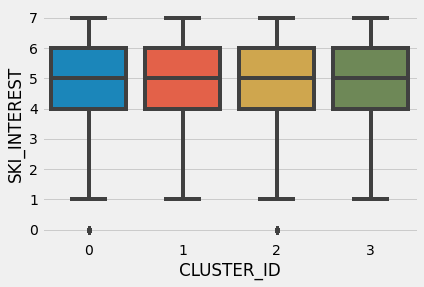

In [ ]:
sns.boxplot(x='CLUSTER_ID', y="SKI_INTEREST", data = clustered_all)

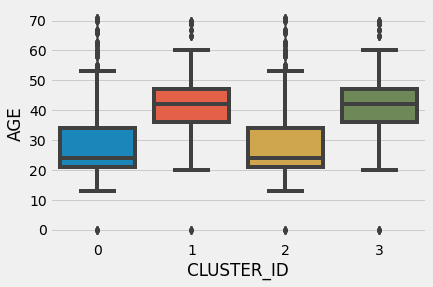

In [ ]:
sns.boxplot(x='CLUSTER_ID', y="AGE", data = clustered_all)

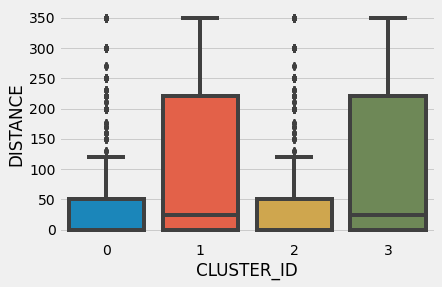

In [ ]:
sns.boxplot(x='CLUSTER_ID', y="DISTANCE", data = clustered_all)

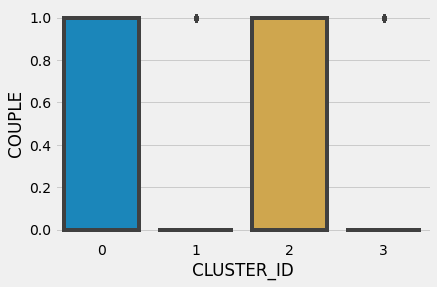

In [ ]:
sns.boxplot(x='CLUSTER_ID', y="COUPLE", data = clustered_all)

In [ ]:
lgcolors = {'magenta','cyan','yellow','gray','maroon','orange','lime','green','royalblue','darkorchid'}

Text(0.5, 1.0, 'CLUSTER ID WITH MIDWEEK')

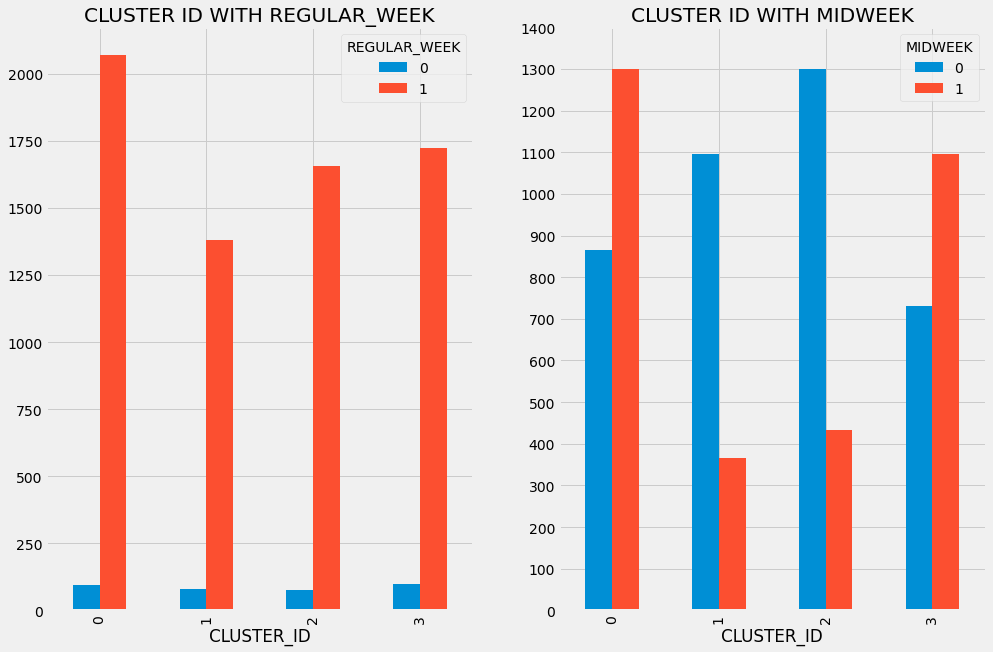

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['REGULAR_WEEK']).plot(kind='bar', ax=ax1,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1000, step=100))
ax1.set_title("CLUSTER ID WITH REGULAR_WEEK")

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['MIDWEEK']).plot(kind='bar', ax=ax2,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1500, step=100))
ax2.set_title("CLUSTER ID WITH MIDWEEK")


Text(0.5, 1.0, 'CLUSTER ID WITH WEEKEND')

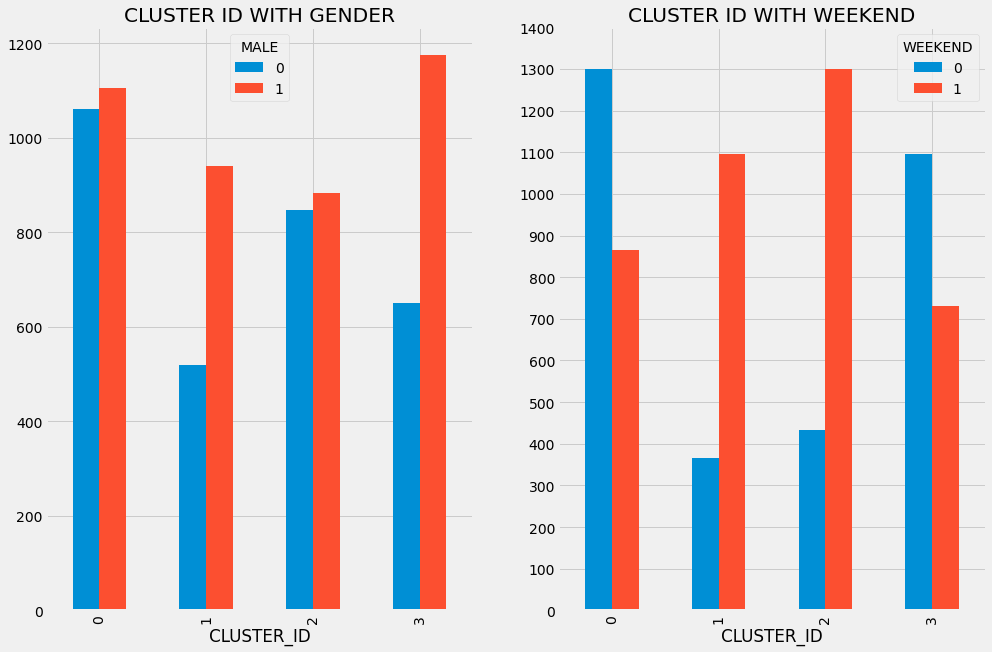

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['MALE']).plot(kind='bar', ax=ax1,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1000, step=100))
ax1.set_title("CLUSTER ID WITH GENDER")

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['WEEKEND']).plot(kind='bar', ax=ax2,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1500, step=100))
ax2.set_title("CLUSTER ID WITH WEEKEND")

Text(0.5, 1.0, 'CLUSTER ID WITH SKI INTEREST')

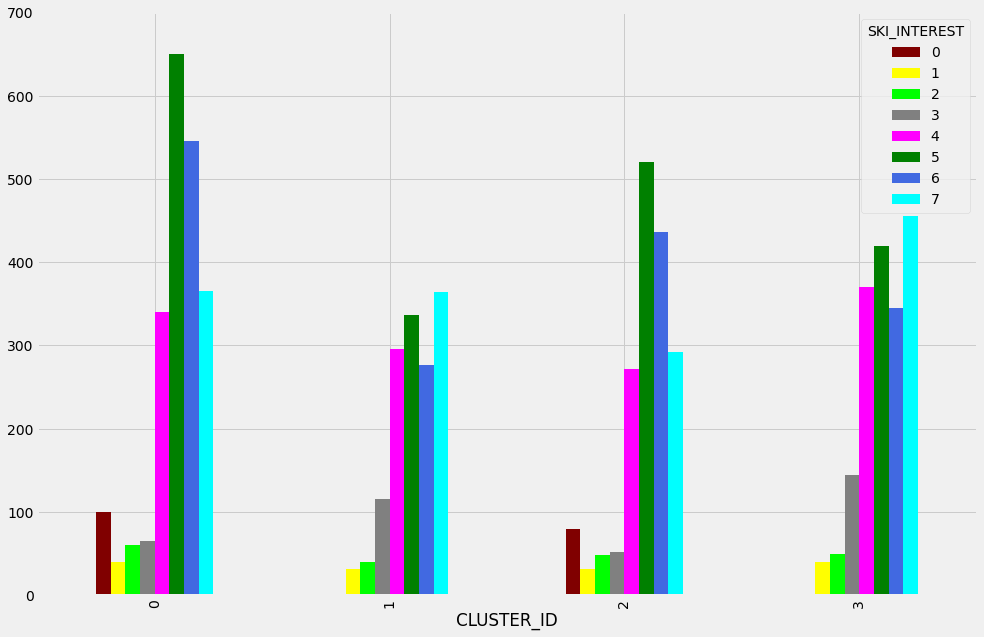

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['SKI_INTEREST'] ).plot(kind='bar',stacked=False, figsize=(15,10), color = lgcolors)
plt.yticks(np.arange(0.00, 800, 100))
ax1.set_title("CLUSTER ID WITH SKI INTEREST")

Text(0.5, 1.0, 'CLUSTER ID WITH INCOME')

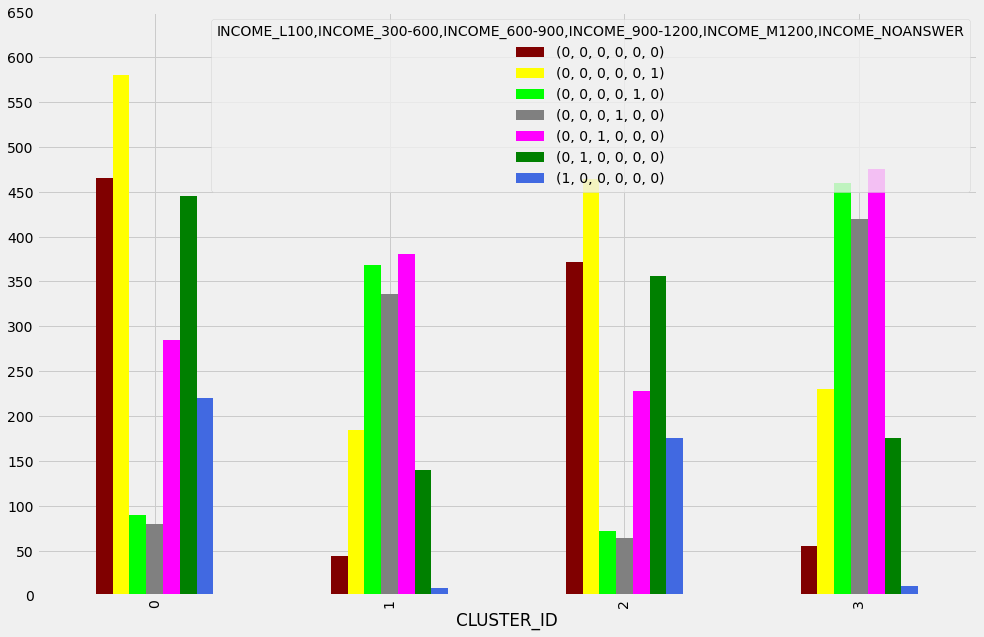

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['INCOME_L100'],clustered_all['INCOME_300-600'],clustered_all['INCOME_600-900'],clustered_all['INCOME_900-1200'],clustered_all['INCOME_M1200'],clustered_all['INCOME_NOANSWER'] ]).plot(kind='bar',stacked=False, figsize=(15,10), color = lgcolors)
plt.yticks(np.arange(0.00, 700, 50))
ax1.set_title("CLUSTER ID WITH INCOME")

Text(0.5, 1.0, "CLUSTER ID WITH 'COUPLE WITH CHILD' vs 'SINGLE' vs 'SINGLE WITH CHILD'")

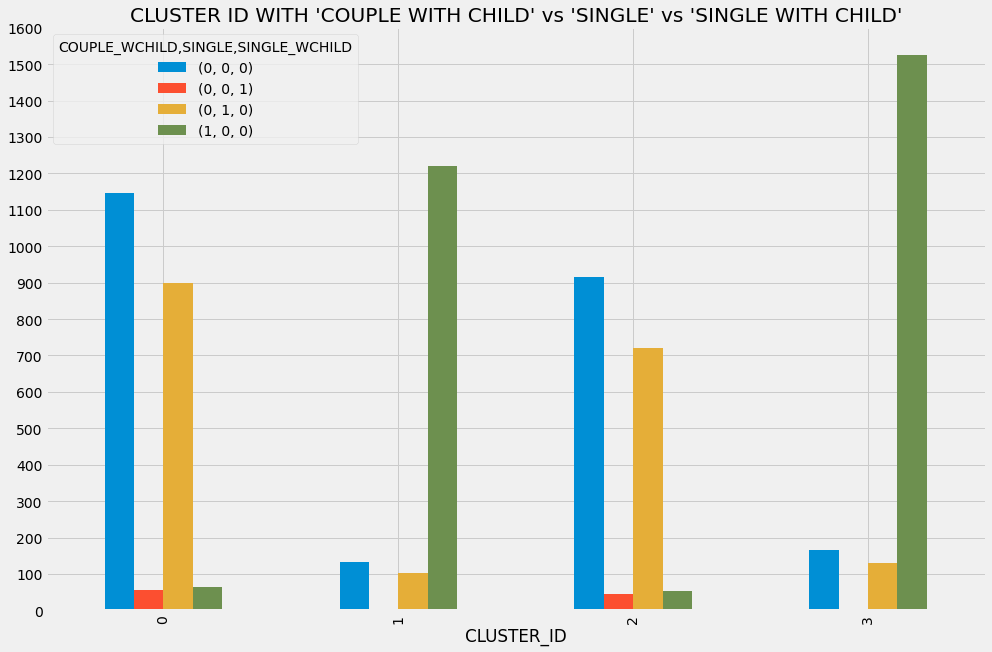

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['COUPLE_WCHILD'], clustered_all['SINGLE'], clustered_all['SINGLE_WCHILD']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1700, 100))
plt.title("CLUSTER ID WITH 'COUPLE WITH CHILD' vs 'SINGLE' vs 'SINGLE WITH CHILD'")

# legend: 0,0 - means 0 for couple_wchild, 0 for single
# 0,0,0 - no couple with child, not single, not SWC - BLUE --> LG: 'SINGLE SOLO SKIERS'
# 0,0,1 - not CWC, not single, yes SWC - ORANGE
# 0,1,0 - no couple with child, yes single, not SWC - YELLOW
# 1,0,0 - couple with child, not single, not SWC - GREEN

Text(0.5, 1.0, 'CLUSTER ID WITH SLOPES OPEN')

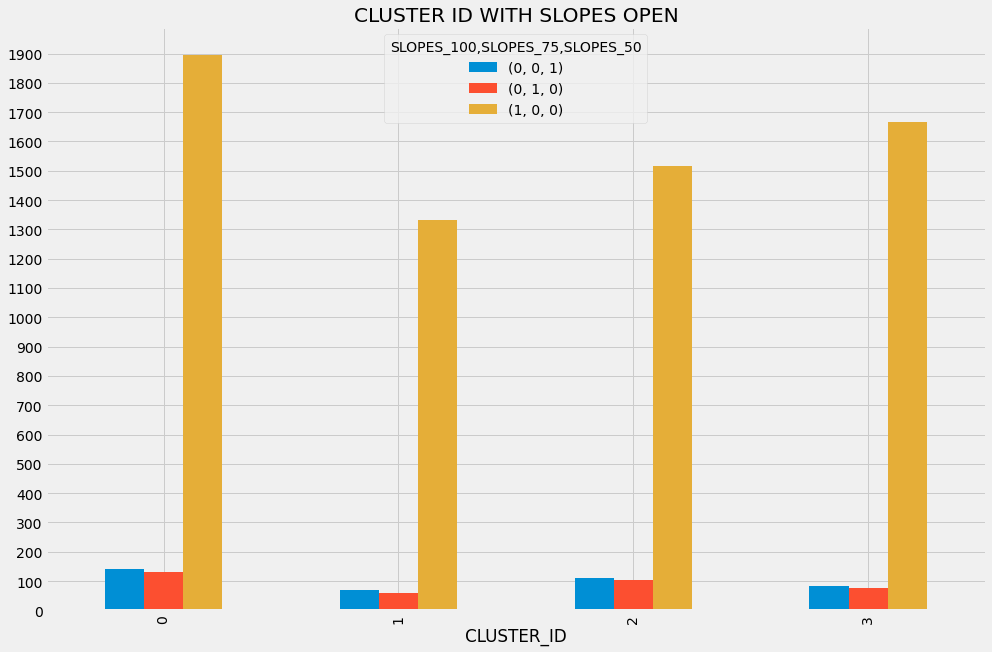

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['SLOPES_100'], clustered_all['SLOPES_75'], clustered_all['SLOPES_50']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,2000, 100))
plt.title("CLUSTER ID WITH SLOPES OPEN")


Text(0.5, 1.0, 'CLUSTER ID WITH QUE TIME')

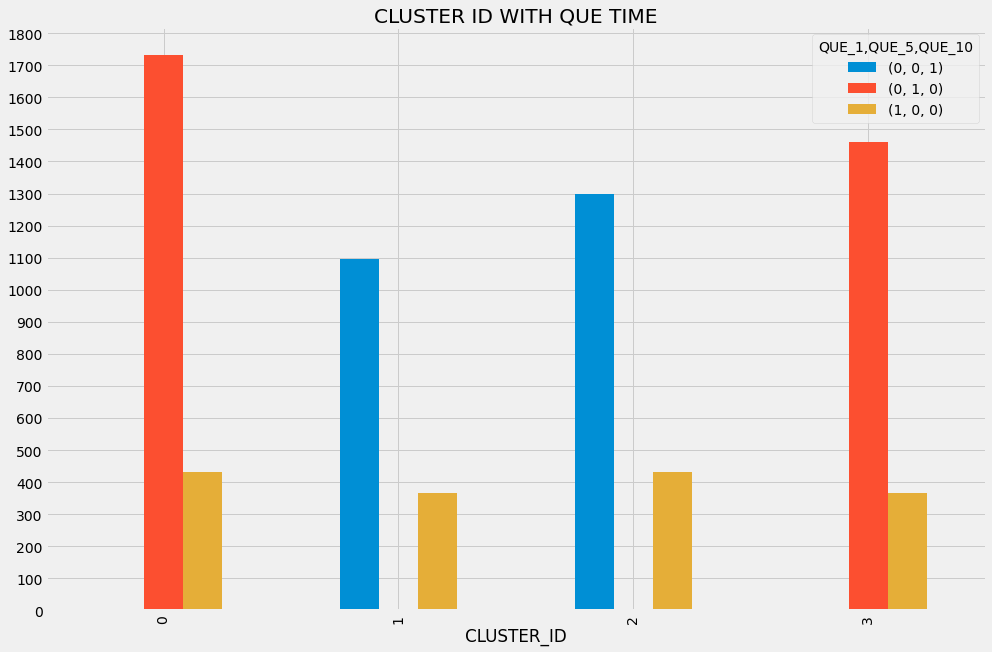

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['QUE_1'], clustered_all['QUE_5'], clustered_all['QUE_10']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1900, 100))
plt.title("CLUSTER ID WITH QUE TIME")

Text(0.5, 1.0, 'CLUSTER ID WITH PRICE')

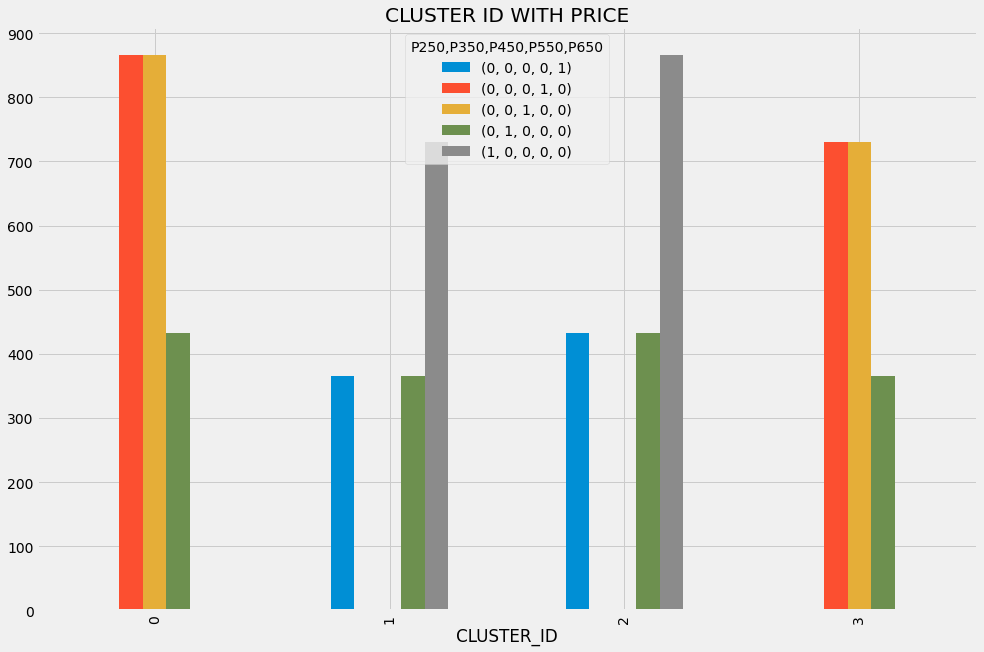

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['P250'], clustered_all['P350'], clustered_all['P450'],clustered_all['P550'],clustered_all['P650']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1000, 100))
plt.title("CLUSTER ID WITH PRICE")

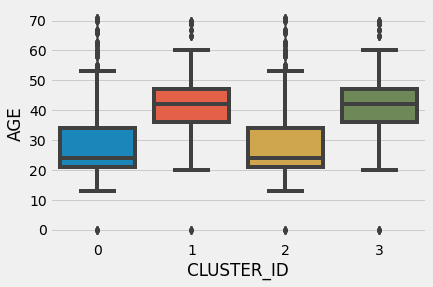

In [ ]:
# pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['AGE']]).plot(kind='bar',stacked=False, figsize=(15,10))
# plt.yticks(np.arange(0.00,100, 10))
# plt.title("CLUSTER ID WITH AGE")

sns.boxplot(x='CLUSTER_ID', y="AGE", data = clustered_all)

Text(0.5, 1.0, "CLUSTER ID WITH TEMP_C, SNOW, SUN, and 'NO WIND'")

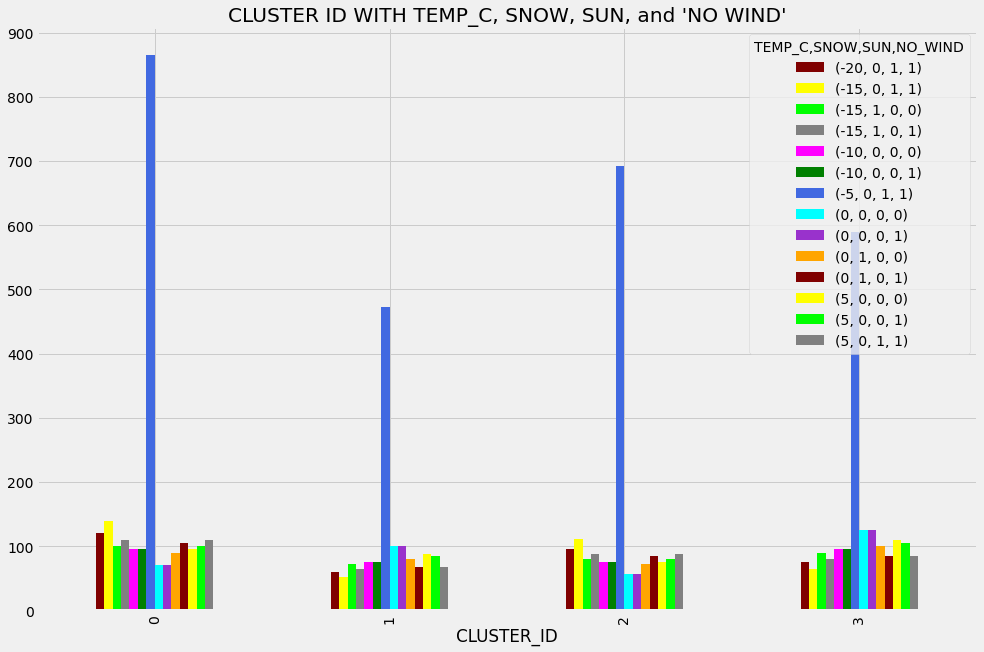

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['TEMP_C'], clustered_all['SNOW'], clustered_all['SUN'], clustered_all['NO_WIND']]).plot(kind='bar',stacked=False, figsize=(15,10), color=lgcolors)
plt.yticks(np.arange(0.00,1000, 100))
plt.title("CLUSTER ID WITH TEMP_C, SNOW, SUN, and 'NO WIND'")

In [ ]:
clustered_all_avgage = clustered_all['AGE'].mean()
clustered_all_avgage

34.6390977443609

In [ ]:
clustered_all.iloc[3000:3010]

CLUSTER_ID  SLOPES_OPEN  RATING  QUE_1  QUE_5  QUE_10  MIDWEEK  WEEKEND  \
3000           0          1.0      40      1      0       0        1        0   
3001           2          1.0      60      0      0       1        0        1   
3002           2          1.0      60      0      0       1        0        1   
3003           0          1.0      60      0      1       0        0        1   
3004           0          1.0      60      0      1       0        0        1   
3005           2          1.0      60      1      0       0        0        1   
3006           2          1.0      50      0      0       1        1        0   
3007           0          1.0      50      0      1       0        1        0   
3008           0          1.0      50      0      1       0        1        0   
3009           0          1.0      50      1      0       0        1        0   

      REGULAR_WEEK  VACATION  P250  P350  P450  P550  P650  SUN  RAIN  SNOW  \
3000             1         0     0     0     0     1     0    0     0     1   
3001             1         0     1     0     0     0     0    0     0     1   
3002             1         0     0     1     0     0     0    0     0     1   
3003             1         0     0     0     1     0     0    0     0     1   
3004             1         0     0     0     0     1     0    0     0     1   
3005             1         0     0     0     0     0     1    0     0     1   
3006             1         0     1     0     0     0     0    0     1     0   
3007             1         0     0     1     0     0     0    0     1     0   
3008             1         0     0     0     1     0     0    0     1     0   
3009             1         0     0     0     0     1     0    0     1     0   

      CLOUD  FOG  TEMP_C  NO_WIND  GENTLE_BREEZE  FRESH_BREEZE  SLOPES_50  \
3000      0    0       0        0              1             0          0   
3001      0    0       0        0              1             0          0   
3002      0    0       0        0              1             0          0   
3003      0    0       0        0              1             0          0   
3004      0    0       0        0              1             0          0   
3005      0    0       0        0              1             0          0   
3006      0    0       5        1              0             0          0   
3007      0    0       5        1              0             0          0   
3008      0    0       5        1              0             0          0   
3009      0    0       5        1              0             0          0   

      SLOPES_75  SLOPES_100  MALE  FEMALE  AGE  HAFJELL_RESIDENCE  \
3000          0           1     0       1   25                  0   
3001          0           1     0       1   25                  0   
3002          0           1     0       1   25                  0   
3003          0           1     0       1   25                  0   
3004          0           1     0       1   25                  0   
3005          0           1     0       1   25                  0   
3006          0           1     0       1   23                  0   
3007          0           1     0       1   23                  0   
3008          0           1     0       1   23                  0   
3009          0           1     0       1   23                  0   

      SKIING_DAYS_TOTAL  SKIING_DAYS_HAFJELL  SKIING_MIDWEEK  SKIING_WEEKEND  \
3000                 10                    5               0               1   
3001                 10                    5               0               1   
3002                 10                    5               0               1   
3003                 10                    5               0               1   
3004                 10                    5               0               1   
3005                 10                    5               0               1   
3006                  4                    4               0               1